<a href="https://colab.research.google.com/github/AndreiAf02/Job-Satisfaction/blob/main/Job_Satisfaction_AT_Seniority.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install semopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 6.9 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=2a52d075ac4bfbe66ed5aabcc7b54ef26e9497c8d25b2211b6a1ebeb05e23d32
  Stored in directory: /root/.cache/pip/wheels/c6/24/8b/be911b059a61f490f38425eb19bf2fed470a5ead97228e8255
Successfully built semopy


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import bootstrap, norm

## Data Preprocessing:

In [ ]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [ ]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")

data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [ ]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [ ]:
print(data_total['Salary/hour'][data_total['Income EURO']>=10**5])

1858    692.3076923076923
2037    576.9230769230769
2490    692.3076923076923
2499                  750
2538                  750
2559    692.3076923076923
2562    634.6153846153845
2583    576.9230769230769
Name: Salary/hour, dtype: object


In [ ]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
# data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_at_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,1,3,1.0,47.0,7.0,Hungary,1.0,2.0,5.0,5.0,...,4.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0
1,1,3,2.0,35.0,NaN,NaN,1.0,2.0,6.0,2.0,...,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0
2,1,3,1.0,51.0,7.0,Australian,3.0,1.0,4.0,5.0,...,4.0,2.0,4.0,5.0,2.0,5.0,3.0,4.0,4.0,4.0
3,1,3,1.0,34.0,7.0,Belgian,2.0,1.0,4.0,7.0,...,2.0,4.0,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0
4,1,3,2.0,29.0,7.0,Ecuadorian,2.0,1.0,4.0,2.0,...,4.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
1324,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
1325,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
1326,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [ ]:
data_at_job = data_at_total[['2 Age (in years):',
    'AT_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    '2  gives high priority to job satisfaction', ## KEEP ORDER
    '3  is good at work planning', ## KEEP ORDER
    '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    '1 There is a good atmosphere between myself and my colleagues ',
    '2 There is good co-operation between the colleagues at work',
    '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? '
]]

In [ ]:
data_at_job.columns.tolist()

['2 Age (in years):',
 'AT_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '8 Duration of your current employment contract at the higher education institution where you primarily work:',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, deali

In [ ]:
data_at_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    'Development_opportunities', ## KEEP ORDER
    'Prioritizes_satisfaction', ## KEEP ORDER
    'Work_planning', ## KEEP ORDER
    'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    'Good_atmosphere',
    'Good_cooperation',
    'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction']

In [ ]:
data_at_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Contract_duration',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Leadership_position',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Performance_pressure',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Development_opportunities',
 'Prioritizes_satisfaction',
 'Work_planning',
 'Solving_conflicts',
 'Good_atmosphere',
 'Good_cooperation',
 'Part_of_community',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction']

In [ ]:
data_at_job = data_at_job.dropna(subset=['Age', 'Current_position', 'Leadership_position']).reset_index(drop=True)
data_at_job = data_at_job[~(data_at_job == '#VALUE!').any(axis=1)]
for col in data_at_job.columns:
  data_at_job[col] = data_at_job[col].astype(str).str.replace(',', '.').astype(float)
data_at_job.to_csv('data_at_job.csv')
data_at_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,47.0,2.0,86.538462,6.0,40.0,100.000000,12.0,6.0,6.0,16.0,...,3.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0
1,35.0,8.0,22.788462,3.0,45.0,112.500000,NaN,35.0,10.0,NaN,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
2,51.0,13.0,20.192308,3.0,40.0,100.000000,0.0,10.0,10.0,80.0,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
3,34.0,8.0,17.884615,3.0,50.0,125.000000,15.0,30.0,2.0,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
4,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,20.0,9.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,27.0,9.0,18.907500,3.0,35.0,116.666667,0.0,25.0,1.0,4.0,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
1300,80.0,13.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0
1301,27.0,9.0,22.061538,3.0,30.0,100.000000,0.0,25.0,0.0,5.0,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
1302,28.0,9.0,13.461538,3.0,42.0,116.666667,2.0,40.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


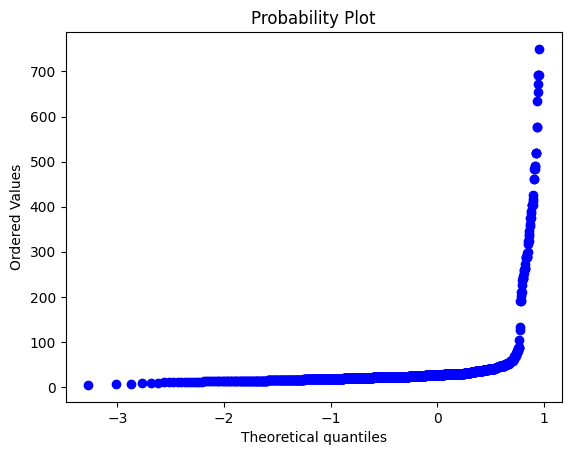

In [ ]:
stats.probplot(data_at_job['Salary'], dist="norm", plot=plt)
plt.show()

In [ ]:
Q1_salary = data_at_job['Salary'].quantile(0.25)
Q3_salary = data_at_job['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 3. * IQR_salary
upper_bound_salary = Q3_salary + 2.8 * IQR_salary

Q1_hrs = data_at_job['Actual_hrs'].quantile(0.25)
Q3_hrs = data_at_job['Actual_hrs'].quantile(0.75)
IQR_hrs = Q3_hrs - Q1_hrs

lower_bound_hrs = Q1_hrs - 3. * IQR_hrs
upper_bound_hrs = Q3_hrs + 3. * IQR_hrs

Q1_effort = data_at_job['Effort'].quantile(0.25)
Q3_effort = data_at_job['Effort'].quantile(0.75)
IQR_effort = Q3_effort - Q1_effort

lower_bound_effort = Q1_effort - 3. * IQR_effort
upper_bound_effort = Q3_effort + 3. * IQR_effort




data_at_job = data_at_job[(data_at_job['Salary'] > lower_bound_salary) & (data_at_job['Salary'] < upper_bound_salary) &
                          (data_at_job['Actual_hrs'] > lower_bound_hrs) & (data_at_job['Actual_hrs'] < upper_bound_hrs) &
                           (data_at_job['Effort'] > lower_bound_effort) & (data_at_job['Effort'] < upper_bound_effort)].reset_index(drop=True)

data_at_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,35.0,8.0,22.788462,3.0,45.0,112.500000,NaN,35.0,10.0,NaN,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
1,51.0,13.0,20.192308,3.0,40.0,100.000000,0.0,10.0,10.0,80.0,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
2,34.0,8.0,17.884615,3.0,50.0,125.000000,15.0,30.0,2.0,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
3,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,20.0,9.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
4,41.0,10.0,21.923077,6.0,40.0,100.000000,35.0,5.0,0.0,5.0,...,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,40.0,11.0,25.961538,1.0,40.0,100.000000,20.0,20.0,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,4.0,4.0
936,27.0,9.0,18.907500,3.0,35.0,116.666667,0.0,25.0,1.0,4.0,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
937,27.0,9.0,22.061538,3.0,30.0,100.000000,0.0,25.0,0.0,5.0,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
938,28.0,9.0,13.461538,3.0,42.0,116.666667,2.0,40.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


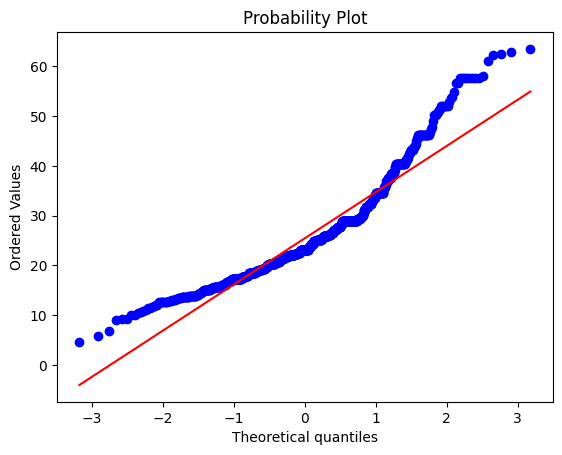

In [ ]:
stats.probplot(data_at_job['Salary'], dist="norm", plot=plt)
plt.show()

In [ ]:
data_at_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,35.0,8.0,22.788462,3.0,45.0,112.500000,NaN,35.0,10.0,NaN,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
1,51.0,13.0,20.192308,3.0,40.0,100.000000,0.0,10.0,10.0,80.0,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
2,34.0,8.0,17.884615,3.0,50.0,125.000000,15.0,30.0,2.0,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
3,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,20.0,9.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
4,41.0,10.0,21.923077,6.0,40.0,100.000000,35.0,5.0,0.0,5.0,...,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,40.0,11.0,25.961538,1.0,40.0,100.000000,20.0,20.0,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,4.0,4.0
936,27.0,9.0,18.907500,3.0,35.0,116.666667,0.0,25.0,1.0,4.0,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
937,27.0,9.0,22.061538,3.0,30.0,100.000000,0.0,25.0,0.0,5.0,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
938,28.0,9.0,13.461538,3.0,42.0,116.666667,2.0,40.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [ ]:
np.sort(data_at_job['Current_position'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [ ]:
data_at_job

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,35.0,8.0,22.788462,3.0,45.0,112.500000,NaN,35.0,10.0,NaN,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
1,51.0,13.0,20.192308,3.0,40.0,100.000000,0.0,10.0,10.0,80.0,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
2,34.0,8.0,17.884615,3.0,50.0,125.000000,15.0,30.0,2.0,5.0,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
3,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,20.0,9.0,5.0,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
4,41.0,10.0,21.923077,6.0,40.0,100.000000,35.0,5.0,0.0,5.0,...,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,40.0,11.0,25.961538,1.0,40.0,100.000000,20.0,20.0,NaN,NaN,...,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,4.0,4.0
936,27.0,9.0,18.907500,3.0,35.0,116.666667,0.0,25.0,1.0,4.0,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
937,27.0,9.0,22.061538,3.0,30.0,100.000000,0.0,25.0,0.0,5.0,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
938,28.0,9.0,13.461538,3.0,42.0,116.666667,2.0,40.0,0.0,0.0,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [ ]:
## Interpolating the missing answer data using averages from each job position:
data_at_job_interpolated = data_at_job
data_at_job_interpolated.columns

for i in range(len(data_at_job_interpolated.columns)-3):
  for j in np.sort(data_at_job_interpolated['Current_position'].unique()):
    interpolation = data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][data_at_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
    & (data_at_job_interpolated['Current_position']== j)] = interpolation

data_at_job_interpolated.to_csv('data_at_job_interpolated.csv')
data_at_job_interpolated



Interpolated Value: 20.075957456410176
Interpolated Value: 41.381715958294905
Interpolated Value: 36.06349532820121
Interpolated Value: 29.13871705217858
Interpolated Value: 38.9467032967033
Interpolated Value: 33.58947173516139
Interpolated Value: 32.728575174825174
Interpolated Value: 26.590242448900938
Interpolated Value: 21.2324724750927
Interpolated Value: 25.50408703520569
Interpolated Value: 21.390911119408155
Interpolated Value: 29.97894821905811
Interpolated Value: 21.769152732654753
Interpolated Value: 1.4307692307692308
Interpolated Value: 2.1052631578947367
Interpolated Value: 1.6470588235294117
Interpolated Value: 1.8636363636363635
Interpolated Value: 3.619047619047619
Interpolated Value: 1.4137931034482758
Interpolated Value: 1.9545454545454546
Interpolated Value: 2.5811965811965814
Interpolated Value: 2.7246376811594204
Interpolated Value: 1.7941176470588236
Interpolated Value: 2.282258064516129
Interpolated Value: 1.9047619047619047
Interpolated Value: 2.5
Interpolated

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 1.1794871794871795
Interpolated Value: 2.3333333333333335
Interpolated Value: 1.7058823529411764
Interpolated Value: 1.3863636363636365
Interpolated Value: 2.0476190476190474
Interpolated Value: 2.206896551724138
Interpolated Value: 2.227272727272727
Interpolated Value: 1.5726495726495726
Interpolated Value: 1.0869565217391304
Interpolated Value: 1.5294117647058822
Interpolated Value: 1.2983870967741935
Interpolated Value: 1.0952380952380953
Interpolated Value: 1.53125
Interpolated Value: 1.876923076923077
Interpolated Value: 3.491228070175439
Interpolated Value: 3.0
Interpolated Value: 2.0681818181818183
Interpolated Value: 2.857142857142857
Interpolated Value: 2.689655172413793
Interpolated Value: 2.4545454545454546
Interpolated Value: 1.7264957264957266
Interpolated Value: 1.6594202898550725
Interpolated Value: 2.2058823529411766
Interpolated Value: 1.653225806451613
Interpolated Value: 2.0
Interpolated Value: 1.9375
Interpolated Value: nan
Interpolated Value: 3.

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 2.814814814814815
Interpolated Value: 2.5157894736842104
Interpolated Value: 2.823529411764706
Interpolated Value: 2.3421052631578947
Interpolated Value: 2.3666666666666667
Interpolated Value: 3.2615384615384615
Interpolated Value: 3.6964285714285716
Interpolated Value: 3.8823529411764706
Interpolated Value: 3.5
Interpolated Value: 3.761904761904762
Interpolated Value: 3.8620689655172415
Interpolated Value: 4.0
Interpolated Value: 3.606837606837607
Interpolated Value: 3.753623188405797
Interpolated Value: 3.4901960784313726
Interpolated Value: 3.6048387096774195
Interpolated Value: 3.380952380952381
Interpolated Value: 3.25
Interpolated Value: 3.4329896907216493
Interpolated Value: 3.6315789473684212
Interpolated Value: 3.4705882352941178
Interpolated Value: 3.3863636363636362
Interpolated Value: 3.7142857142857144
Interpolated Value: 3.3448275862068964
Interpolated Value: 3.3181818181818183
Interpolated Value: 3.324786324786325
Interpolated Value: 3.183823529411764

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.379032258064516
Interpolated Value: 2.9523809523809526
Interpolated Value: 3.03125
Interpolated Value: 3.247422680412371
Interpolated Value: 3.473684210526316
Interpolated Value: 3.4705882352941178
Interpolated Value: 3.558139534883721
Interpolated Value: 3.7142857142857144
Interpolated Value: 3.2758620689655173
Interpolated Value: 3.3636363636363638
Interpolated Value: 3.5689655172413794
Interpolated Value: 3.2681159420289854
Interpolated Value: 3.588235294117647
Interpolated Value: 3.620967741935484
Interpolated Value: 3.880952380952381
Interpolated Value: 3.21875
Interpolated Value: 3.594871794871795
Interpolated Value: 3.7017543859649122
Interpolated Value: 3.6470588235294117
Interpolated Value: 3.7045454545454546
Interpolated Value: 4.0476190476190474
Interpolated Value: 3.5517241379310347
Interpolated Value: 3.5454545454545454
Interpolated Value: 3.658119658119658
Interpolated Value: 3.572463768115942
Interpolated Value: 3.843137254901961
Interpolated Value:

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.6231884057971016
Interpolated Value: 3.4901960784313726
Interpolated Value: 3.8306451612903225
Interpolated Value: 3.8095238095238093
Interpolated Value: 3.84375
Interpolated Value: 2.850515463917526
Interpolated Value: 3.9464285714285716
Interpolated Value: 3.0588235294117645
Interpolated Value: 3.7045454545454546
Interpolated Value: 3.380952380952381
Interpolated Value: 3.6551724137931036
Interpolated Value: 3.3181818181818183
Interpolated Value: 2.213675213675214
Interpolated Value: 2.5
Interpolated Value: 2.9215686274509802
Interpolated Value: 2.6451612903225805
Interpolated Value: 2.9523809523809526
Interpolated Value: 2.5625
Interpolated Value: 3.6205128205128205
Interpolated Value: 4.175438596491228
Interpolated Value: 3.75
Interpolated Value: 3.272727272727273
Interpolated Value: 3.9523809523809526
Interpolated Value: 3.8275862068965516
Interpolated Value: 3.8181818181818183
Interpolated Value: 3.752136752136752
Interpolated Value: 3.72992700729927
Interpo

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,35.0,8.0,22.788462,3.0,45.0,112.500000,9.043103,35.0,10.000000,7.025862,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
1,51.0,13.0,20.192308,3.0,40.0,100.000000,0.000000,10.0,10.000000,80.000000,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
2,34.0,8.0,17.884615,3.0,50.0,125.000000,15.000000,30.0,2.000000,5.000000,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
3,29.0,11.0,26.373626,3.0,35.0,100.000000,1.000000,20.0,9.000000,5.000000,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
4,41.0,10.0,21.923077,6.0,40.0,100.000000,35.000000,5.0,0.000000,5.000000,...,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,40.0,11.0,25.961538,1.0,40.0,100.000000,20.000000,20.0,6.452174,6.046610,...,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,4.0,4.0
936,27.0,9.0,18.907500,3.0,35.0,116.666667,0.000000,25.0,1.000000,4.000000,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
937,27.0,9.0,22.061538,3.0,30.0,100.000000,0.000000,25.0,0.000000,5.000000,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
938,28.0,9.0,13.461538,3.0,42.0,116.666667,2.000000,40.0,0.000000,0.000000,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [ ]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_at_job_w_inversion = data_at_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_at_job_w_inversion[col].unique()))
  data_at_job_w_inversion[col] = max(data_at_job_w_inversion[col])+1 - data_at_job_w_inversion[col]
  print(col, ":", np.sort(data_at_job_w_inversion[col].unique()))

data_at_job_w_inversion.to_csv('data_at_job_w_inversion.csv')
data_at_job_w_inversion



Before: Follow_commands : [1. 2. 3. 4. 5.]
Follow_commands : [1. 2. 3. 4. 5.]
Before: Do_differently : [1.         2.         3.         3.25       3.37209302 3.3960396
 4.         5.        ]
Do_differently : [1.         2.         2.6039604  2.62790698 2.75       3.
 4.         5.        ]
Before: Forced_to_do : [1.         2.         2.38613861 2.7810219  3.         4.
 5.        ]
Forced_to_do : [1.         2.         3.         3.2189781  3.61386139 4.
 5.        ]


,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,...,Work_planning,Solving_conflicts,Good_atmosphere,Good_cooperation,Part_of_community,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction
0,35.0,8.0,22.788462,3.0,45.0,112.500000,9.043103,35.0,10.000000,7.025862,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0
1,51.0,13.0,20.192308,3.0,40.0,100.000000,0.000000,10.0,10.000000,80.000000,...,2.0,2.0,5.0,3.0,2.0,4.0,3.0,1.0,1.0,2.0
2,34.0,8.0,17.884615,3.0,50.0,125.000000,15.000000,30.0,2.000000,5.000000,...,4.0,4.0,4.0,4.0,4.0,2.0,5.0,4.0,4.0,4.0
3,29.0,11.0,26.373626,3.0,35.0,100.000000,1.000000,20.0,9.000000,5.000000,...,4.0,2.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0
4,41.0,10.0,21.923077,6.0,40.0,100.000000,35.000000,5.0,0.000000,5.000000,...,2.0,3.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,40.0,11.0,25.961538,1.0,40.0,100.000000,20.000000,20.0,6.452174,6.046610,...,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,4.0,4.0
936,27.0,9.0,18.907500,3.0,35.0,116.666667,0.000000,25.0,1.000000,4.000000,...,2.0,1.0,3.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
937,27.0,9.0,22.061538,3.0,30.0,100.000000,0.000000,25.0,0.000000,5.000000,...,3.0,4.0,5.0,4.0,4.0,2.0,2.0,4.0,3.0,4.0
938,28.0,9.0,13.461538,3.0,42.0,116.666667,2.000000,40.0,0.000000,0.000000,...,1.0,2.0,3.0,3.0,3.0,1.0,2.0,2.0,1.0,2.0


In [ ]:
data_at_formatted = data_at_job_w_inversion

data_at_formatted = data_at_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_at_formatted['Teaching_percent'] = data_at_formatted['Teaching_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted['Research_percent'] = data_at_formatted['Research_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted = data_at_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_at_formatted['Academic_Resources'] = data_at_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_at_formatted['Perceived_Autonomy'] = data_at_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)


## Calculating average score for Leadership quality:
data_at_formatted['Leadership_quality'] = data_at_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
data_at_formatted['Sense_of_community'] = data_at_formatted[['Good_atmosphere', 'Good_cooperation',
                                                             'Part_of_community']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_at_formatted['Job_satisfaction'] = data_at_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_at_formatted.to_csv('data_at_formatted.csv')
print(data_at_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Contract_duration', 'Actual_hrs', 'Effort', 'Leadership_position', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction']


In [ ]:
data_at_formatted

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,35.0,8.0,22.788462,3.0,45.0,112.500000,1.0,1.0,3.0,14.808018,57.312253,3.333333,3.333333,4.00,3.333333,3.4
1,51.0,13.0,20.192308,3.0,40.0,100.000000,3.0,2.0,1.0,0.000000,10.000000,1.500000,2.166667,2.75,3.333333,2.2
2,34.0,8.0,17.884615,3.0,50.0,125.000000,1.0,3.0,4.0,28.846154,57.692308,3.500000,3.833333,4.00,4.000000,3.8
3,29.0,11.0,26.373626,3.0,35.0,100.000000,1.0,1.0,4.0,2.857143,57.142857,3.500000,3.166667,2.75,3.333333,2.8
4,41.0,10.0,21.923077,6.0,40.0,100.000000,2.0,3.0,3.0,77.777778,11.111111,4.333333,4.333333,2.75,4.000000,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,40.0,11.0,25.961538,1.0,40.0,100.000000,1.0,1.0,2.0,38.096120,38.096120,2.333333,4.833333,5.00,5.000000,3.8
935,27.0,9.0,18.907500,3.0,35.0,116.666667,1.0,2.0,5.0,0.000000,83.333333,4.333333,1.666667,1.75,2.000000,2.6
936,27.0,9.0,22.061538,3.0,30.0,100.000000,1.0,1.0,3.0,0.000000,83.333333,3.500000,4.166667,3.75,4.333333,3.0
937,28.0,9.0,13.461538,3.0,42.0,116.666667,4.0,1.0,5.0,4.761905,95.238095,2.333333,1.500000,1.50,3.000000,1.6


In [ ]:
## Taking only academic positions:

# data_at_formatted_academic = data_at_formatted[~data_at_formatted['Current_position'].isin([1., 13.])]

data_at_formatted_academic = data_at_formatted[data_at_formatted['Current_position'].isin([2., 3., 4., 5., 6., 7., 8., 9.])]

np.sort(data_at_formatted_academic['Current_position'].unique())

data_at_formatted_academic['Current_position'].value_counts().sort_index()

,count
Current_position,
2.0,57
3.0,17
4.0,44
5.0,21
6.0,29
7.0,22
8.0,117
9.0,137


In [ ]:
## Inverting the categorical values so that seniority is in increasing order:

data_at_formatted_academic['Current_position'] = 11. - data_at_formatted_academic['Current_position']
data_at_formatted_academic.loc[data_at_formatted_academic['Current_position'] > 6, 'Current_position'] = 6
data_at_formatted_academic['Current_position'].value_counts().sort_index()

/tmp/ipython-input-4090973165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_at_formatted_academic['Current_position'] = 11. - data_at_formatted_academic['Current_position']


,count
Current_position,
2.0,137
3.0,117
4.0,22
5.0,29
6.0,139


**Contract duration has 7 values, but only 6 possible responses. To remove the outliers with few values and leave only 1, 2, 3, and 6?**

**Similarly, Leadership position has only 3 possible responses, but 4 values. To remove 4 and leave only 1-3?**

In [ ]:
np.sort(data_at_formatted_academic['Contract_duration'].unique())
data_at_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
3.0,186
1.0,140
2.0,85
6.0,31
7.0,1
5.0,1


In [ ]:
data_at_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,280
2.0,78
3.0,68
4.0,18


In [ ]:
## Cleaning up the outlier values in Contract Duration and Leadership position prior to creating dummy variables:
data_at_formatted_academic = data_at_formatted_academic[data_at_formatted_academic['Contract_duration'].isin([1., 2., 3., 6.])].reset_index(drop=True)
data_at_formatted_academic = data_at_formatted_academic[data_at_formatted_academic['Leadership_position']<4].reset_index(drop=True)

data_at_formatted_academic['Contract_duration'].value_counts()

,count
Contract_duration,
3.0,185
1.0,127
2.0,84
6.0,28


In [ ]:
data_at_formatted_academic['Leadership_position'].value_counts()

,count
Leadership_position,
1.0,278
2.0,78
3.0,68


In [ ]:
data_at_formatted_academic.to_csv('data_at_formatted_seniority.csv')
data_at_formatted_academic

,Age,Current_position,Salary,Contract_duration,Actual_hrs,Effort,Leadership_position,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Job_satisfaction
0,35.0,3.0,22.788462,3.0,45.0,112.500000,1.0,1.0,3.0,14.808018,57.312253,3.333333,3.333333,4.00,3.333333,3.4
1,34.0,3.0,17.884615,3.0,50.0,125.000000,1.0,3.0,4.0,28.846154,57.692308,3.500000,3.833333,4.00,4.000000,3.8
2,26.0,2.0,21.758242,3.0,35.0,100.000000,1.0,2.0,4.0,11.428571,80.000000,4.166667,3.500000,3.75,4.666667,4.6
3,36.0,3.0,28.846154,3.0,50.0,125.000000,1.0,1.0,5.0,16.666667,50.000000,2.666667,2.500000,1.75,5.000000,2.0
4,29.0,3.0,28.846154,3.0,40.0,100.000000,1.0,1.0,4.0,7.500000,87.500000,4.333333,4.333333,5.00,4.000000,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,57.0,6.0,62.884615,1.0,50.0,125.000000,2.0,2.0,4.0,16.000000,16.000000,4.166667,3.000000,3.25,3.333333,4.0
420,42.0,6.0,28.846154,1.0,52.5,131.250000,2.0,3.0,4.0,34.482759,34.482759,4.500000,4.000000,3.75,5.000000,4.8
421,27.0,2.0,18.907500,3.0,35.0,116.666667,1.0,2.0,5.0,0.000000,83.333333,4.333333,1.666667,1.75,2.000000,2.6
422,27.0,2.0,22.061538,3.0,30.0,100.000000,1.0,1.0,3.0,0.000000,83.333333,3.500000,4.166667,3.75,4.333333,3.0


Text(0.5, 1.0, 'Austrian Positions')

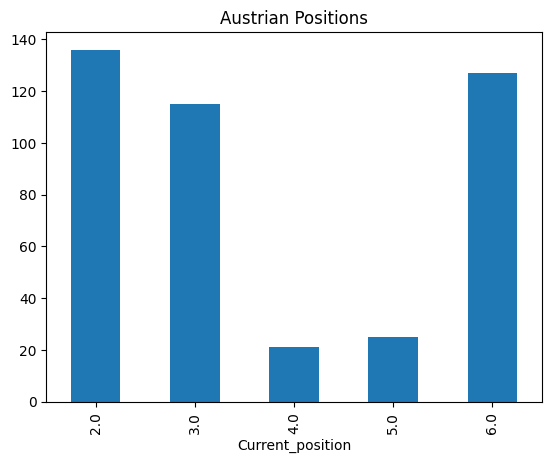

In [ ]:
data_at_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar')
plt.title('Austrian Positions')

In [ ]:
data_at_formatted_academic['Current_position'][data_at_formatted_academic['Contract_duration']==6].value_counts()

,count
Current_position,
6.0,24
5.0,2
4.0,2


In [ ]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

data_at_formatted_academic_w_dummies = pd.get_dummies(data_at_formatted_academic, columns = ['Current_position', 'Contract_duration', 'Leadership_position'], drop_first=True)

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.dropna().reset_index(drop=True)

data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.astype(float)

Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col]
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols]

## Calculating the interaction terms for Age moderator:
for col in Working_condition_cols:
  data_at_formatted_academic_w_dummies[col+'_mod_Age'] = data_at_formatted_academic_w_dummies[col] * data_at_formatted_academic_w_dummies['Age']

# data_at_formatted_academic_w_dummies = data_at_formatted_academic_w_dummies.drop(['Age_mod_Age'], axis=1)

data_at_formatted_academic_w_dummies.to_csv('data_at_formatted_academic_w_dummies.csv')

print(data_at_formatted_academic_w_dummies.columns.tolist())
print(np.shape(data_at_formatted_academic_w_dummies))

['Age', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Performance_pressure', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Leadership_quality', 'Sense_of_community', 'Job_satisfaction', 'Current_position_3.0', 'Current_position_4.0', 'Current_position_5.0', 'Current_position_6.0', 'Contract_duration_2.0', 'Contract_duration_3.0', 'Contract_duration_6.0', 'Leadership_position_2.0', 'Leadership_position_3.0', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Performance_pressure_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Leadership_quality_mod_Age', 'Sense_of_community_mod_Age', 'Contract_duration_2.0_mod_Age', 'Contract_duration_3.0_mod_Age', 'Contract_duration_6.0_mod_Age', 'Leadership_position_2.0_mod_Age', 'Leadership_position_3.0_mod_Age']
(424, 38)


##Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'AT Correlation Heatmap')

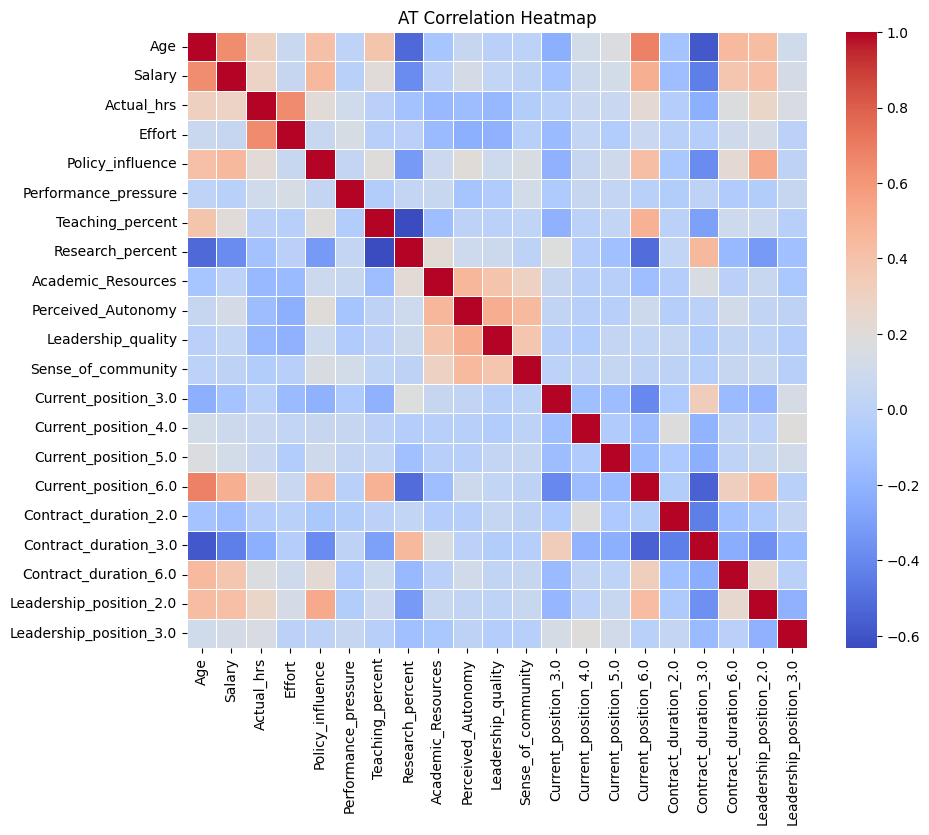

In [ ]:
corr_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' not in col and 'Job_satisfaction' not in col]
correlations = data_at_formatted_academic_w_dummies[corr_cols].corr()

plt.figure(figsize=(10, 8)) #, dpi=600)
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('AT Correlation Heatmap')

In [ ]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]
## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' in col] # and 'Job_satisfaction' not in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if col not in ['Job_satisfaction']+['Age']+Current_position_dummy_cols+Moderation_cols]

for cols in [Current_position_dummy_cols, Working_condition_cols, Moderation_cols]:
  if cols == Current_position_dummy_cols:
    print('Current Position:')
  elif cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_at_formatted_academic_w_dummies[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Current Position:
               Variable       VIF
0                 const  3.117647
1  Current_position_3.0  1.345016
2  Current_position_4.0  1.097236
3  Current_position_5.0  1.114023
4  Current_position_6.0  1.354589
----------------------------------------
Working Conditions:
                   Variable         VIF
0                     const  114.111751
1                    Salary    1.838483
2                Actual_hrs    2.143326
3                    Effort    1.916095
4          Policy_influence    1.698396
5      Performance_pressure    1.106718
6          Teaching_percent    1.851965
7          Research_percent    2.350975
8        Academic_Resources    1.494919
9        Perceived_Autonomy    1.863377
10       Leadership_quality    1.503381
11       Sense_of_community    1.389695
12    Contract_duration_2.0    1.694523
13    Contract_duration_3.0    2.565615
14    Contract_duration_6.0    1.241786
15  Leadership_position_2.0    1.941540
16  Leadership_position_3.0    1.2894

## Calculating Cronbach's Alpha for the combined factors:

In [ ]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [ ]:
## Academic Resources:

data_at_for_alpha_academic = data_at_job_w_inversion[(data_at_job_w_inversion['Current_position'].isin([2., 3., 4., 5., 6., 7., 8., 9.])) &
                                                     (data_at_job_w_inversion['Contract_duration']<6) &
                                                     (data_at_job_w_inversion['Leadership_position']<4)].dropna()
## Performing inversion:
data_at_for_alpha_academic['Current_position'] = 11. - data_at_for_alpha_academic['Current_position']

print(len(data_at_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_at_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_at_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

leadership_quality_for_alpha = np.asarray(data_at_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
                                                             'Work_planning', 'Solving_conflicts']])

sense_of_community_for_alpha = np.asarray(data_at_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_at_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']])


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





397
Academic Resources Cronbach Alpha: 0.7714424609550872
Perceived Autonomy Cronbach Alpha: 0.8722571642442942
Leadership Quality Cronbach Alpha: 0.8876063234851378
Sense of Community Cronbach Alpha: 0.8663875887262201
---------------------
Job Satisfaction Cronbach Alpha: 0.7354334968944474


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [ ]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']
Current_position_dummy_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'Current_position' in col and 'mod_Age' not in col]

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic_w_dummies.columns if 'mod_Age' in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted_academic_w_dummies.columns if col not in Job_satisfaction_col+Age_col+Current_position_dummy_cols+Moderation_cols]

Working_condition_cols

['Salary',
 'Actual_hrs',
 'Effort',
 'Policy_influence',
 'Performance_pressure',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy',
 'Leadership_quality',
 'Sense_of_community',
 'Contract_duration_2.0',
 'Contract_duration_3.0',
 'Contract_duration_6.0',
 'Leadership_position_2.0',
 'Leadership_position_3.0']

In [ ]:
Current_position_dummy_cols

['Current_position_3.0',
 'Current_position_4.0',
 'Current_position_5.0',
 'Current_position_6.0']

In [ ]:
Moderation_cols

['Salary_mod_Age',
 'Actual_hrs_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Performance_pressure_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age',
 'Leadership_quality_mod_Age',
 'Sense_of_community_mod_Age',
 'Contract_duration_2.0_mod_Age',
 'Contract_duration_3.0_mod_Age',
 'Contract_duration_6.0_mod_Age',
 'Leadership_position_2.0_mod_Age',
 'Leadership_position_3.0_mod_Age']

In [ ]:
Current_position_factors = " + ".join(Current_position_dummy_cols)
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)

path_no_mod = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_6.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors}
"""



path = f"""
Salary ~ {Current_position_factors}
Actual_hrs ~ {Current_position_factors}
Effort ~ {Current_position_factors}
Policy_influence ~ {Current_position_factors}
Performance_pressure ~ {Current_position_factors}
Teaching_percent ~ {Current_position_factors}
Research_percent ~ {Current_position_factors}
Academic_Resources ~ {Current_position_factors}
Perceived_Autonomy ~ {Current_position_factors}
Leadership_quality ~ {Current_position_factors}
Sense_of_community ~ {Current_position_factors}
Contract_duration_2.0 ~ {Current_position_factors}
Contract_duration_3.0 ~ {Current_position_factors}
Contract_duration_6.0 ~ {Current_position_factors}
Leadership_position_2.0 ~ {Current_position_factors}
Leadership_position_3.0 ~ {Current_position_factors}
Job_satisfaction ~ {Working_condition_factors} + {Current_position_factors} + {Moderation_factors}
"""


In [ ]:
model = semopy.Model(path)
result = model.fit(data_at_formatted_academic_w_dummies)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 48.705
Number of iterations: 292
Params: 5.353 11.199 12.085 15.143 3.699 6.671 6.376 7.470 -8.483 -0.234 -6.957 -0.688 0.069 0.719 0.898 1.173 -0.150 0.202 0.130 -0.067 1.744 8.919 11.356 24.011 -7.277 -18.070 -26.537 -33.335 -0.065 -0.205 -0.207 -0.296 0.159 0.012 0.023 0.235 -0.014 -0.203 0.218 0.090 0.051 0.072 0.235 0.064 -0.071 0.296 -0.148 -0.055 -0.046 -0.750 -0.750 -0.734 -0.000 0.095 0.080 0.189 0.048 0.168 0.258 0.419 0.221 0.454 0.298 0.128 0.029 -0.013 -0.003 -0.058 -0.049 0.005 0.016 0.238 0.082 0.083 0.248 -0.103 -0.083 -0.481 -0.264 0.204 -0.062 0.123 0.096 0.160 -0.001 0.000 -0.000 0.003 0.001 -0.000 -0.000 0.002 0.006 -0.001 -0.004 0.002 -0.005 0.009 0.004 -0.006 0.549 89.366 0.152 0.121 0.055 420.550 0.243 0.118 0.120 1.251 0.829 1.014 0.947 369.188 67.120 0.896 325.713


In [ ]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF              586.000000
DoF Baseline     686.000000
chi2           20650.795439
chi2 p-value       0.000000
chi2 Baseline  27668.248541
CFI                0.256371
GFI                0.253628
AGFI               0.126261
NFI                0.253628
TLI                0.129471
RMSEA              0.284511
AIC              136.590588
BIC              610.409402
LogLik            48.704706
-------------------------


In [ ]:
ins = model.inspect()
print(ins)
ins.to_csv('AT_Model_Parameter_Values.csv')

                   lval  op                  rval    Estimate   Std. Err  \
0                Salary   ~  Current_position_3.0    5.353412   1.037875   
1                Salary   ~  Current_position_4.0   11.199402   1.920867   
2                Salary   ~  Current_position_5.0   12.084941   1.782790   
3                Salary   ~  Current_position_6.0   15.143367   1.010958   
4            Actual_hrs   ~  Current_position_3.0    3.699277   1.197580   
..                  ...  ..                   ...         ...        ...   
112    Research_percent  ~~      Research_percent  369.187750  25.355919   
113              Salary  ~~                Salary   67.120215   4.609835   
114  Sense_of_community  ~~    Sense_of_community    0.896200   0.061551   
115    Teaching_percent  ~~      Teaching_percent  325.712943  22.370057   
116    Job_satisfaction  ~~      Job_satisfaction    0.242904   0.016683   

       z-value       p-value  
0     5.158050  2.495353e-07  
1     5.830388  5.529876e

In [ ]:
ins[ins['p-value']<0.05]

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Salary,~,Current_position_3.0,5.353412,1.037875,5.158050,2.495353e-07
1,Salary,~,Current_position_4.0,11.199402,1.920867,5.830388,5.529876e-09
2,Salary,~,Current_position_5.0,12.084941,1.782790,6.778668,1.212896e-11
3,Salary,~,Current_position_6.0,15.143367,1.010958,14.979220,0.000000e+00
4,Actual_hrs,~,Current_position_3.0,3.699277,1.197580,3.088960,2.008587e-03
...,...,...,...,...,...,...,...
112,Research_percent,~~,Research_percent,369.187750,25.355919,14.560220,0.000000e+00
113,Salary,~~,Salary,67.120215,4.609835,14.560220,0.000000e+00
114,Sense_of_community,~~,Sense_of_community,0.896200,0.061551,14.560220,0.000000e+00
115,Teaching_percent,~~,Teaching_percent,325.712943,22.370057,14.560220,0.000000e+00


In [ ]:
significance = []

for i in range(len(ins)):
  if ins['p-value'].iloc[i] <= 0.001:
    significance.append('***')
  elif 0.001 < ins['p-value'].iloc[i] <= 0.01:
    significance.append('**')
  elif 0.01 < ins['p-value'].iloc[i] <= 0.05:
    significance.append('*')
  else:
    significance.append(' (n.s.)')

ins['Significance'] = significance

ins['Estimate w Significance'] = round(ins['Estimate'],5).astype(str) + ins['Significance']
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value,Significance,Estimate w Significance
0,Salary,~,Current_position_3.0,5.353412,1.037875,5.158050,2.495353e-07,***,5.35341***
1,Salary,~,Current_position_4.0,11.199402,1.920867,5.830388,5.529876e-09,***,11.1994***
2,Salary,~,Current_position_5.0,12.084941,1.782790,6.778668,1.212896e-11,***,12.08494***
3,Salary,~,Current_position_6.0,15.143367,1.010958,14.979220,0.000000e+00,***,15.14337***
4,Actual_hrs,~,Current_position_3.0,3.699277,1.197580,3.088960,2.008587e-03,**,3.69928**
...,...,...,...,...,...,...,...,...,...
112,Research_percent,~~,Research_percent,369.187750,25.355919,14.560220,0.000000e+00,***,369.18775***
113,Salary,~~,Salary,67.120215,4.609835,14.560220,0.000000e+00,***,67.12022***
114,Sense_of_community,~~,Sense_of_community,0.896200,0.061551,14.560220,0.000000e+00,***,0.8962***
115,Teaching_percent,~~,Teaching_percent,325.712943,22.370057,14.560220,0.000000e+00,***,325.71294***


In [ ]:
ins

## Saving the Job Position pathway coefficients for the SEM:
job_pos_paths = pd.DataFrame()
job_pos_paths['lval'] = ins['lval'][ins['rval']==Current_position_dummy_cols[0]]

for curr_pos in Current_position_dummy_cols:
  job_pos_paths = pd.merge(job_pos_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==curr_pos], on='lval', how='left')
  job_pos_paths.rename(columns={job_pos_paths.columns[-1]: curr_pos}, inplace=True)

job_pos_paths


## Saving the Working Conditions pathway coefficients for the SEM:
work_cond_paths = pd.DataFrame()
work_cond_paths['lval'] = [ins['lval'][ins['rval']==Working_condition_cols[0]].iloc[0]]

for work_cond in Working_condition_cols:
  work_cond_paths = pd.merge(work_cond_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==work_cond], on='lval', how='left')
  work_cond_paths.rename(columns={work_cond_paths.columns[-1]: work_cond}, inplace=True)

work_cond_paths


# ## Saving the moderator pathway coefficients for the SEM:
mod_age_paths = pd.DataFrame()
mod_age_paths['lval'] = [ins['lval'][ins['rval']==Moderation_cols[0]].iloc[0]]

for mod_age in Moderation_cols:
  mod_age_paths = pd.merge(mod_age_paths, ins[['lval', 'Estimate w Significance']][ins['rval']==mod_age], on='lval', how='left')
  mod_age_paths.rename(columns={mod_age_paths.columns[-1]: mod_age}, inplace=True)


job_pos_paths



,lval,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
0,Salary,5.35341***,11.1994***,12.08494***,15.14337***
1,Actual_hrs,3.69928**,6.67132**,6.37649**,7.47014***
2,Effort,-8.48265**,-0.23412 (n.s.),-6.95749 (n.s.),-0.68771 (n.s.)
3,Policy_influence,0.06865 (n.s.),0.71915**,0.89824***,1.17288***
4,Performance_pressure,-0.15 (n.s.),0.20238 (n.s.),0.13001 (n.s.),-0.06735 (n.s.)
5,Teaching_percent,1.74414 (n.s.),8.91855*,11.35633**,24.01077***
6,Research_percent,-7.27653**,-18.07042***,-26.53678***,-33.33474***
7,Academic_Resources,-0.06513 (n.s.),-0.20474 (n.s.),-0.20732 (n.s.),-0.29616**
8,Perceived_Autonomy,0.15861 (n.s.),0.01224 (n.s.),0.02271 (n.s.),0.23544*
9,Leadership_quality,-0.0135 (n.s.),-0.20251 (n.s.),0.21793 (n.s.),0.08951 (n.s.)


In [ ]:
work_cond_paths.set_index('lval').T

lval,Job_satisfaction
Salary,0.02946***
Actual_hrs,-0.01332***
Effort,-0.00251*
Policy_influence,-0.05839*
Performance_pressure,-0.04887*
Teaching_percent,0.00472***
Research_percent,0.01558***
Academic_Resources,0.23832***
Perceived_Autonomy,0.08223**
Leadership_quality,0.08322***


In [ ]:
mod_age_paths.set_index('lval').T

lval,Job_satisfaction
Salary_mod_Age,-0.00052***
Actual_hrs_mod_Age,0.00042***
Effort_mod_Age,-3e-05 (n.s.)
Policy_influence_mod_Age,0.00276***
Performance_pressure_mod_Age,0.00078 (n.s.)
Teaching_percent_mod_Age,-0.00011**
Research_percent_mod_Age,-0.00037***
Academic_Resources_mod_Age,0.0016 (n.s.)
Perceived_Autonomy_mod_Age,0.00612***
Leadership_quality_mod_Age,-0.00091 (n.s.)


In [ ]:
med_mod_path_values = pd.DataFrame(columns = ['Current_position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  path_coeff = [curr_pos]
  for work_cond in Working_condition_cols:
    try:
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                        (ins['lval']==work_cond)])* float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
    except:
      path_coeff.append(np.nan)
  med_mod_path_values.loc[len(med_mod_path_values)] = path_coeff
med_mod_path_values

/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
/tmp/ipython-input-1715873352.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &


,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,0.157733,-0.049278,0.021326,-0.004009,0.007331,0.008241,-0.113344,-0.015522,0.013042,-0.001124,0.012530,0.007340,0.003802,3.014650e-07,-0.012538,0.045122
1,Current_position_4.0,0.329980,-0.088869,0.000589,-0.041990,-0.009891,0.042138,-0.281477,-0.048793,0.001007,-0.016852,0.017929,-0.030399,0.062456,-4.581632e-02,-0.044449,0.092546
2,Current_position_5.0,0.356072,-0.084941,0.017491,-0.052446,-0.006354,0.053656,-0.413355,-0.049409,0.001867,0.018135,0.058208,0.015204,0.062456,-3.848492e-02,-0.068076,0.060716
3,Current_position_6.0,0.446185,-0.099510,0.001729,-0.068483,0.003292,0.113445,-0.519245,-0.070581,0.019360,0.007449,0.015944,0.005623,0.061144,-9.091027e-02,-0.110553,0.025992


## Performing Sobel Test for Mediation Effects

In [ ]:
Sobel_z_stat_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_val_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins['Estimate'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins['Std. Err'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins['Std. Err'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z
  Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p

Sobel_z_stat_df

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,4.5923***,-2.6638**,1.798 (n.s.),-0.5421 (n.s.),1.0207 (n.s.),0.746 (n.s.),-2.9075**,-0.6907 (n.s.),1.259 (n.s.),-0.0953 (n.s.),0.4213 (n.s.),1.0944 (n.s.),0.7869 (n.s.),0.0 (n.s.),-1.0496 (n.s.),2.5471*
1,Current_position_4.0,5.0476***,-2.6126**,0.0487 (n.s.),-1.8964 (n.s.),-0.7912 (n.s.),1.814 (n.s.),-3.8195***,-1.1636 (n.s.),0.0574 (n.s.),-0.7574 (n.s.),0.3258 (n.s.),-1.4863 (n.s.),1.2012 (n.s.),-1.6313 (n.s.),-1.8313 (n.s.),2.6097**
2,Current_position_5.0,5.6259***,-2.6707**,1.263 (n.s.),-2.0718*,-0.57 (n.s.),2.2452*,-5.6595***,-1.2665 (n.s.),0.1146 (n.s.),0.8725 (n.s.),1.1326 (n.s.),1.2076 (n.s.),1.2026 (n.s.),-1.4928 (n.s.),-2.551*,2.3643*
3,Current_position_6.0,8.3658***,-4.0652***,0.2696 (n.s.),-2.3073*,0.5241 (n.s.),3.3827***,-9.3436***,-2.9655**,1.7411 (n.s.),0.6396 (n.s.),0.5499 (n.s.),0.941 (n.s.),1.2085 (n.s.),-3.8165***,-3.535***,2.0976*


In [ ]:
Sobel_z_stat_df.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,4.5923***,5.0476***,5.6259***,8.3658***
Actual_hrs,-2.6638**,-2.6126**,-2.6707**,-4.0652***
Effort,1.798 (n.s.),0.0487 (n.s.),1.263 (n.s.),0.2696 (n.s.)
Policy_influence,-0.5421 (n.s.),-1.8964 (n.s.),-2.0718*,-2.3073*
Performance_pressure,1.0207 (n.s.),-0.7912 (n.s.),-0.57 (n.s.),0.5241 (n.s.)
Teaching_percent,0.746 (n.s.),1.814 (n.s.),2.2452*,3.3827***
Research_percent,-2.9075**,-3.8195***,-5.6595***,-9.3436***
Academic_Resources,-0.6907 (n.s.),-1.1636 (n.s.),-1.2665 (n.s.),-2.9655**
Perceived_Autonomy,1.259 (n.s.),0.0574 (n.s.),0.1146 (n.s.),1.7411 (n.s.)
Leadership_quality,-0.0953 (n.s.),-0.7574 (n.s.),0.8725 (n.s.),0.6396 (n.s.)


In [ ]:
Sobel_p_val_df.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.000004,4.474001e-07,1.844969e-08,5.971643e-17
Actual_hrs,0.007727,8.985770e-03,7.569944e-03,4.799308e-05
Effort,0.072177,9.611745e-01,2.066020e-01,7.874479e-01
Policy_influence,0.587780,5.790990e-02,3.828181e-02,2.104004e-02
Performance_pressure,0.307392,4.288543e-01,5.686742e-01,6.002151e-01
Teaching_percent,0.455696,6.967789e-02,2.475788e-02,7.178132e-04
Research_percent,0.003644,1.337261e-04,1.518255e-08,9.314338e-21
Academic_Resources,0.489742,2.445965e-01,2.053252e-01,3.021625e-03
Perceived_Autonomy,0.208044,9.542604e-01,9.087905e-01,8.167250e-02
Leadership_quality,0.924114,4.488360e-01,3.829532e-01,5.224087e-01


## Sobel Test for Moderation Effects:

In [ ]:
Sobel_z_mod_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_mod_df  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins['Estimate'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins['Std. Err'][(ins['rval']==curr_pos) & (ins['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins['Std. Err'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_mod_df.loc[len(Sobel_z_mod_df)] = Sobel_z
  Sobel_p_mod_df.loc[len(Sobel_p_mod_df)] = Sobel_p

Sobel_z_mod_df

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,-4.3279***,2.5824**,0.7768 (n.s.),0.5519 (n.s.),-0.8729 (n.s.),-0.7403 (n.s.),2.8461**,-0.6418 (n.s.),1.3513 (n.s.),0.0951 (n.s.),-0.4199 (n.s.),-0.8536 (n.s.),0.923 (n.s.),-0.0 (n.s.),0.9772 (n.s.),-2.9314**
1,Current_position_4.0,-4.7027***,2.5357*,0.0486 (n.s.),2.5187*,0.716 (n.s.),-1.737 (n.s.),3.6836***,-0.9665 (n.s.),0.0574 (n.s.),0.6837 (n.s.),-0.3252 (n.s.),1.0049 (n.s.),1.9922*,1.6152 (n.s.),1.5116 (n.s.),-3.028**
2,Current_position_5.0,-5.1596***,2.5887**,0.7116 (n.s.),2.981**,0.5399 (n.s.),-2.1039*,5.2433***,-1.0231 (n.s.),0.1146 (n.s.),-0.7648 (n.s.),-1.1075 (n.s.),-0.9041 (n.s.),1.9987*,1.4804 (n.s.),1.847 (n.s.),-2.6618**
3,Current_position_6.0,-7.026***,3.7924***,0.2573 (n.s.),3.8514***,-0.5004 (n.s.),-2.9499**,7.7599***,-1.4978 (n.s.),2.0138*,-0.5934 (n.s.),-0.547 (n.s.),-0.7745 (n.s.),2.0264*,3.6237***,2.1345*,-2.2971*


In [ ]:
Sobel_z_mod_df.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,-4.3279***,-4.7027***,-5.1596***,-7.026***
Actual_hrs,2.5824**,2.5357*,2.5887**,3.7924***
Effort,0.7768 (n.s.),0.0486 (n.s.),0.7116 (n.s.),0.2573 (n.s.)
Policy_influence,0.5519 (n.s.),2.5187*,2.981**,3.8514***
Performance_pressure,-0.8729 (n.s.),0.716 (n.s.),0.5399 (n.s.),-0.5004 (n.s.)
Teaching_percent,-0.7403 (n.s.),-1.737 (n.s.),-2.1039*,-2.9499**
Research_percent,2.8461**,3.6836***,5.2433***,7.7599***
Academic_Resources,-0.6418 (n.s.),-0.9665 (n.s.),-1.0231 (n.s.),-1.4978 (n.s.)
Perceived_Autonomy,1.3513 (n.s.),0.0574 (n.s.),0.1146 (n.s.),2.0138*
Leadership_quality,0.0951 (n.s.),0.6837 (n.s.),-0.7648 (n.s.),-0.5934 (n.s.)


In [ ]:
Sobel_p_mod_df.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.000015,0.000003,2.474535e-07,2.125792e-12
Actual_hrs,0.009810,0.011221,9.633287e-03,1.491803e-04
Effort,0.437257,0.961236,4.766971e-01,7.969358e-01
Policy_influence,0.581011,0.011779,2.873315e-03,1.174222e-04
Performance_pressure,0.382745,0.473963,5.892618e-01,6.167862e-01
Teaching_percent,0.459115,0.082380,3.538294e-02,3.178690e-03
Research_percent,0.004425,0.000230,1.577029e-07,8.502664e-15
Academic_Resources,0.521030,0.333815,3.062782e-01,1.341731e-01
Perceived_Autonomy,0.176588,0.954254,9.087408e-01,4.402978e-02
Leadership_quality,0.924250,0.494151,4.443662e-01,5.529139e-01


## Path Modelling with No Moderation:

In [ ]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_at_formatted_academic_w_dummies)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 3.605
Number of iterations: 237
Params: 5.317 11.113 11.975 15.107 3.693 6.604 6.402 7.464 -8.586 -0.180 -6.877 -0.797 0.069 0.719 0.898 1.173 -0.150 0.202 0.130 -0.067 1.885 9.614 10.888 24.145 -7.136 -17.349 -26.244 -33.200 -0.065 -0.205 -0.207 -0.296 0.159 0.012 0.023 0.235 -0.014 -0.202 0.218 0.090 0.051 0.072 0.235 0.064 -0.071 0.296 -0.148 -0.055 -0.046 -0.750 -0.750 -0.734 0.000 0.095 0.080 0.189 0.048 0.168 0.258 0.419 0.221 0.454 0.298 0.128 0.007 0.004 -0.004 0.047 -0.011 -0.000 0.002 0.303 0.335 0.038 0.122 -0.044 -0.225 0.049 -0.010 -0.073 -0.086 0.130 0.109 0.215 0.549 90.454 0.152 0.121 0.055 419.998 0.252 0.118 0.120 1.251 0.829 1.014 0.947 368.520 67.413 0.896 325.803


In [ ]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                     Value
DoF             130.000000
DoF Baseline    214.000000
chi2           1528.681329
chi2 p-value      0.000000
chi2 Baseline  3292.108485
CFI               0.545604
GFI               0.535653
AGFI              0.235613
NFI               0.535653
TLI               0.251994
RMSEA             0.159484
AIC             194.789239
BIC             603.812318
LogLik            3.605380
-------------------------


In [ ]:
ins_no_mod = model_no_mod.inspect()
print(ins_no_mod)
ins_no_mod.to_csv('AT_No_Mod_Model_Parameter_Values.csv')

                   lval  op                  rval    Estimate   Std. Err  \
0                Salary   ~  Current_position_3.0    5.316953   1.040136   
1                Salary   ~  Current_position_4.0   11.112528   1.925052   
2                Salary   ~  Current_position_5.0   11.974758   1.786674   
3                Salary   ~  Current_position_6.0   15.107063   1.013161   
4            Actual_hrs   ~  Current_position_3.0    3.692940   1.204846   
..                  ...  ..                   ...         ...        ...   
96     Research_percent  ~~      Research_percent  368.520393  25.310085   
97               Salary  ~~                Salary   67.412970   4.629942   
98   Sense_of_community  ~~    Sense_of_community    0.896197   0.061551   
99     Teaching_percent  ~~      Teaching_percent  325.802776  22.376227   
100    Job_satisfaction  ~~      Job_satisfaction    0.252078   0.017313   

       z-value       p-value  
0     5.111785  3.191287e-07  
1     5.772586  7.806412e

## Sobel Test for Mediation Effect (No Moderation)

In [ ]:
Sobel_z_stat_no_mod  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)
Sobel_p_val_no_mod  = pd.DataFrame(columns = ['Current_Position'] + Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  Sobel_z = [curr_pos]
  Sobel_p = [curr_pos]
  for work_cond in Working_condition_cols:
    JP_WC_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) & (ins_no_mod['lval']==work_cond)].iloc[0])  ## The coefficient between Job Position and Working Condition
    JP_WC_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==curr_pos) & (ins_no_mod['lval']==work_cond)].iloc[0])  ## The coeff standard deviation between Job Position and Working Condition
    WC_JS_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]) ## The coefficient between Working Condition and Job Satisfaction
    WC_JS_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]) ## The coeff standard deviation between Working Condition and Job Satisfaction
    ## Calculating Sobel Z-value statistic:
    z_value = (JP_WC_mean*WC_JS_mean)/np.sqrt(JP_WC_mean**2 * WC_JS_std**2 + WC_JS_mean**2 * JP_WC_std**2)

    ## Calculating two-tailed Sobel p-value:
    p_value_two_tailed = 2 * norm.sf(abs(z_value))

    if p_value_two_tailed<=0.001:
      sig = '***'
    elif p_value_two_tailed <= 0.01:
      sig = '**'
    elif p_value_two_tailed <= 0.05:
      sig = '*'
    else:
      sig = ' (n.s.)'
    Sobel_z.append(round(z_value,4).astype(str)+sig)
    Sobel_p.append(p_value_two_tailed)

  Sobel_z_stat_no_mod.loc[len(Sobel_z_stat_no_mod)] = Sobel_z
  Sobel_p_val_no_mod.loc[len(Sobel_p_val_no_mod)] = Sobel_p

Sobel_z_stat_no_mod

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,2.0733*,1.4975 (n.s.),2.2962*,0.534 (n.s.),0.4083 (n.s.),-0.3148 (n.s.),-1.5763 (n.s.),-0.6915 (n.s.),1.367 (n.s.),-0.0963 (n.s.),0.4199 (n.s.),0.6354 (n.s.),0.9851 (n.s.),0.0 (n.s.),-0.1398 (n.s.),-1.0215 (n.s.)
1,Current_position_4.0,2.1111*,1.485 (n.s.),0.0374 (n.s.),1.6232 (n.s.),-0.3881 (n.s.),-0.3368 (n.s.),-1.6816 (n.s.),-1.169 (n.s.),0.0574 (n.s.),-0.7045 (n.s.),0.3252 (n.s.),-0.691 (n.s.),3.0366**,0.4526 (n.s.),-0.1406 (n.s.),-1.0255 (n.s.)
2,Current_position_5.0,2.1485*,1.5008 (n.s.),1.3885 (n.s.),1.7292 (n.s.),-0.351 (n.s.),-0.338 (n.s.),-1.7913 (n.s.),-1.2733 (n.s.),0.1145 (n.s.),0.7943 (n.s.),1.1084 (n.s.),0.6555 (n.s.),3.0598**,0.4492 (n.s.),-0.1408 (n.s.),-1.0086 (n.s.)
3,Current_position_6.0,2.2424*,1.657 (n.s.),0.3136 (n.s.),1.8592 (n.s.),0.3394 (n.s.),-0.3404 (n.s.),-1.8525 (n.s.),-3.0549**,2.0669*,0.6079 (n.s.),0.547 (n.s.),0.6007 (n.s.),3.1619**,0.4675 (n.s.),-0.1409 (n.s.),-0.9847 (n.s.)


In [ ]:
Sobel_z_stat_no_mod.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,2.0733*,2.1111*,2.1485*,2.2424*
Actual_hrs,1.4975 (n.s.),1.485 (n.s.),1.5008 (n.s.),1.657 (n.s.)
Effort,2.2962*,0.0374 (n.s.),1.3885 (n.s.),0.3136 (n.s.)
Policy_influence,0.534 (n.s.),1.6232 (n.s.),1.7292 (n.s.),1.8592 (n.s.)
Performance_pressure,0.4083 (n.s.),-0.3881 (n.s.),-0.351 (n.s.),0.3394 (n.s.)
Teaching_percent,-0.3148 (n.s.),-0.3368 (n.s.),-0.338 (n.s.),-0.3404 (n.s.)
Research_percent,-1.5763 (n.s.),-1.6816 (n.s.),-1.7913 (n.s.),-1.8525 (n.s.)
Academic_Resources,-0.6915 (n.s.),-1.169 (n.s.),-1.2733 (n.s.),-3.0549**
Perceived_Autonomy,1.367 (n.s.),0.0574 (n.s.),0.1145 (n.s.),2.0669*
Leadership_quality,-0.0963 (n.s.),-0.7045 (n.s.),0.7943 (n.s.),0.6079 (n.s.)


In [ ]:
Sobel_p_val_no_mod.set_index('Current_Position').T

Current_Position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0
Salary,0.038145,0.034763,0.031672,0.024933
Actual_hrs,0.134263,0.137556,0.133418,0.097518
Effort,0.021665,0.970135,0.164998,0.753836
Policy_influence,0.593336,0.104542,0.083771,0.063002
Performance_pressure,0.683086,0.697907,0.725612,0.734302
Teaching_percent,0.752932,0.736262,0.735341,0.733553
Research_percent,0.114951,0.092638,0.073245,0.063957
Academic_Resources,0.489224,0.242419,0.202908,0.002251
Perceived_Autonomy,0.171637,0.954230,0.908815,0.038745
Leadership_quality,0.923280,0.481119,0.427033,0.543247


## Bootstrapping:

In [ ]:
times = 2000

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']


mediation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)
moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols)
mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  if i % 20 ==0:
    print(f'Run: {i}/{times}')
  data_at_bootstrapped = data_at_formatted_academic_w_dummies.sample(n=len(data_at_formatted_academic_w_dummies), replace=True, random_state=i).reset_index(drop=True)

  # model = semopy.Model(path)
  result = model.fit(data_at_bootstrapped)
  ins = model.inspect()
  # model_no_mod = semopy.Model(path_no_mod)
  result_no_mod = model_no_mod.fit(data_at_bootstrapped)
  ins_no_mod = model_no_mod.inspect()

  if 'Optimization terminated successfully' in result.message and 'Optimization terminated successfully' in result_no_mod.message:
    # print('Optimization Successful')

    ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
    fit_evaluation = semopy.calc_stats(model)
    # print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff = [i, curr_pos]
      mod_coeff = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
        mod_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']==work_cond)].iloc[0]) * float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff.append(float(ins['Estimate'][(ins['rval']==curr_pos) &
                          (ins['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff = path_coeff + fit_evaluation.iloc[0].tolist()
      mediation_path_values.loc[len(mediation_path_values)] = path_coeff
      moderation_path_values.loc[len(moderation_path_values)] = mod_coeff


    ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    # print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

    for curr_pos in Current_position_dummy_cols:
      path_coeff_no_mod = [i, curr_pos]
      for work_cond in Working_condition_cols:
        path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']==work_cond)].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==curr_pos) &
                          (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      path_coeff_no_mod = path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
      mediation_path_values_no_mod.loc[len(mediation_path_values_no_mod)] = path_coeff_no_mod

  else:
    print('Run:', i)
    print('Optimization Unsuccessful')

mediation_path_values

Run: 0/2000
Run: 20/2000
Run: 40/2000
Run: 60/2000
Run: 80/2000
Run: 100/2000
Run: 120/2000
Run: 140/2000
Run: 160/2000
Run: 180/2000
Run: 200/2000
Run: 220/2000
Run: 240/2000
Run: 260/2000
Run: 280/2000
Run: 300/2000
Run: 320/2000
Run: 340/2000
Run: 360/2000
Run: 380/2000
Run: 400/2000
Run: 420/2000
Run: 440/2000
Run: 460/2000
Run: 480/2000
Run: 500/2000
Run: 520/2000
Run: 540/2000
Run: 560/2000
Run: 580/2000
Run: 600/2000
Run: 620/2000
Run: 640/2000
Run: 660/2000
Run: 680/2000
Run: 700/2000
Run: 720/2000
Run: 740/2000
Run: 760/2000
Run: 780/2000
Run: 800/2000
Run: 820/2000
Run: 840/2000
Run: 860/2000
Run: 880/2000
Run: 900/2000
Run: 920/2000
Run: 940/2000
Run: 960/2000
Run: 980/2000
Run: 1000/2000
Run: 1020/2000
Run: 1040/2000
Run: 1060/2000
Run: 1080/2000
Run: 1100/2000
Run: 1120/2000
Run: 1140/2000
Run: 1160/2000
Run: 1180/2000
Run: 1200/2000
Run: 1220/2000
Run: 1240/2000
Run: 1260/2000
Run: 1280/2000
Run: 1300/2000
Run: 1320/2000
Run: 1340/2000
Run: 1360/2000
Run: 1380/2000
Run: 1

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,0.355724,-0.190924,-0.000188,0.001915,0.012955,-0.030083,-0.064544,0.001010,...,28155.809601,0.250570,0.248016,0.119691,0.248016,0.122681,0.288187,134.128732,607.947546,49.935634
1,0,Current_position_4.0,0.644258,-0.069173,-0.000150,-0.073654,-0.004275,0.087396,-0.234842,0.005847,...,28155.809601,0.250570,0.248016,0.119691,0.248016,0.122681,0.288187,134.128732,607.947546,49.935634
2,0,Current_position_5.0,1.003390,-0.342188,-0.000334,-0.049604,0.016528,0.076568,-0.312394,0.002825,...,28155.809601,0.250570,0.248016,0.119691,0.248016,0.122681,0.288187,134.128732,607.947546,49.935634
3,0,Current_position_6.0,0.899079,-0.372447,-0.000012,-0.102342,0.026195,0.205849,-0.478030,0.005620,...,28155.809601,0.250570,0.248016,0.119691,0.248016,0.122681,0.288187,134.128732,607.947546,49.935634
4,1,Current_position_3.0,0.206515,-0.056582,0.024892,-0.013377,-0.011167,0.001104,-0.056337,0.000022,...,28268.604239,0.236204,0.234009,0.103294,0.234009,0.105863,0.291533,131.860922,605.679737,51.069539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,0.548792,0.027911,-0.002663,-0.593643,0.004011,-0.076142,-0.095893,-0.051218,...,29823.121039,0.252408,0.249956,0.121962,0.249956,0.124833,0.296440,128.487418,602.306233,52.756291
7996,1999,Current_position_3.0,0.200176,-0.135643,-0.041230,0.002390,0.020549,-0.018905,-0.200221,0.000102,...,29073.428007,0.248901,0.246468,0.117878,0.246468,0.120727,0.293287,130.661465,604.480279,51.669268
7997,1999,Current_position_4.0,0.359684,-0.028733,-0.041162,-0.025667,-0.044354,0.096998,-0.677862,-0.018779,...,29073.428007,0.248901,0.246468,0.117878,0.246468,0.120727,0.293287,130.661465,604.480279,51.669268
7998,1999,Current_position_5.0,0.378020,-0.201130,-0.041111,-0.035807,-0.034310,0.092894,-0.703021,-0.005862,...,29073.428007,0.248901,0.246468,0.117878,0.246468,0.120727,0.293287,130.661465,604.480279,51.669268


In [ ]:
moderation_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,0,Current_position_3.0,-0.007053,0.004331,0.000208,-0.000083,-0.000303,0.000719,0.001272,-0.000566,0.001646,0.000541,-0.001061,-0.001035,-0.000019,-3.697596e-09,0.000527,0.001191
1,0,Current_position_4.0,-0.012774,0.001569,0.000166,0.003196,0.000100,-0.002089,0.004627,-0.003278,-0.000719,0.001932,0.000702,0.001479,-0.000235,1.664875e-03,0.001550,0.001580
2,0,Current_position_5.0,-0.019895,0.007763,0.000370,0.002152,-0.000387,-0.001830,0.006156,-0.001584,0.001073,-0.000956,-0.002032,-0.002914,-0.000235,2.393272e-03,0.002587,0.001692
3,0,Current_position_6.0,-0.017827,0.008449,0.000013,0.004441,-0.000613,-0.004919,0.009419,-0.003151,0.001237,-0.000498,0.000144,-0.001439,-0.000227,3.452579e-03,0.005814,0.000644
4,1,Current_position_3.0,-0.003316,0.001774,0.000113,0.000407,0.000223,-0.000075,0.001503,0.000003,0.000605,-0.000307,0.000031,-0.000044,0.000804,-2.730999e-08,0.000429,-0.004042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,-0.010185,-0.000117,0.000242,0.016032,-0.000068,0.001313,0.001809,0.000511,0.002457,-0.000498,-0.000205,-0.000224,-0.009489,5.700322e-03,0.009807,0.002437
7996,1999,Current_position_3.0,-0.003921,0.003807,0.001803,-0.000175,-0.000280,0.000309,0.004358,0.000002,0.000862,-0.000775,0.000084,-0.000842,-0.000265,1.331627e-10,0.000092,-0.001033
7997,1999,Current_position_4.0,-0.007045,0.000806,0.001800,0.001879,0.000605,-0.001586,0.014754,-0.000400,0.000587,0.000316,-0.000261,0.004536,-0.001864,1.628361e-09,0.000250,-0.001973
7998,1999,Current_position_5.0,-0.007404,0.005644,0.001797,0.002621,0.000468,-0.001519,0.015301,-0.000125,0.000409,-0.000571,-0.000935,-0.002319,-0.001864,-1.543654e-09,0.000459,-0.000292


In [ ]:
mediation_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,0.037385,-0.009038,0.005672,-0.001442,0.001632,0.003540,-0.013523,-0.024452,...,3244.972805,0.537833,0.528250,0.223428,0.528250,0.239203,0.159606,194.779176,603.802255,3.610412
1,0,Current_position_4.0,0.067781,-0.003010,0.004764,0.055383,-0.000538,-0.010386,-0.048762,-0.141780,...,3244.972805,0.537833,0.528250,0.223428,0.528250,0.239203,0.159606,194.779176,603.802255,3.610412
2,0,Current_position_5.0,0.105416,-0.016158,0.010038,0.037300,0.002082,-0.009100,-0.064526,-0.068498,...,3244.972805,0.537833,0.528250,0.223428,0.528250,0.239203,0.159606,194.779176,603.802255,3.610412
3,0,Current_position_6.0,0.094420,-0.017722,0.000523,0.076956,0.003300,-0.024253,-0.099658,-0.136254,...,3244.972805,0.537833,0.528250,0.223428,0.528250,0.239203,0.159606,194.779176,603.802255,3.610412
4,1,Current_position_3.0,0.066584,0.021810,0.029751,0.003857,-0.000905,-0.004890,-0.004602,0.000179,...,3415.636207,0.528211,0.519710,0.209368,0.519710,0.223363,0.165736,194.261806,603.284885,3.869097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,0.134985,0.021649,0.006209,0.071293,0.000376,-0.019070,-0.053697,-0.033264,...,3929.235198,0.528237,0.520846,0.211239,0.520846,0.223406,0.178531,193.119295,602.142374,4.440353
7996,1999,Current_position_3.0,0.034161,0.014449,0.025312,-0.003374,0.008287,-0.006493,-0.049568,0.000151,...,3633.894634,0.526961,0.519044,0.208273,0.519044,0.221306,0.171519,193.755935,602.779014,4.122033
7997,1999,Current_position_4.0,0.061224,0.003004,0.026636,0.036230,-0.017885,0.033997,-0.167463,-0.031867,...,3633.894634,0.526961,0.519044,0.208273,0.519044,0.221306,0.171519,193.755935,602.779014,4.122033
7998,1999,Current_position_5.0,0.063583,0.021284,0.024830,0.050544,-0.013835,0.033662,-0.172749,-0.009942,...,3633.894634,0.526961,0.519044,0.208273,0.519044,0.221306,0.171519,193.755935,602.779014,4.122033


In [ ]:
mediation_path_values.to_csv('AT_mediation_path_values.csv')
moderation_path_values.to_csv('AT_moderation_path_values.csv')
mediation_path_values_no_mod.to_csv('AT_mediation_path_values_no_mod.csv')

In [75]:
path_to_bootstrap = 'https://raw.githubusercontent.com/AndreiAf02/Job-Satisfaction/refs/heads/main/AT_bootstrap/'

mediation_path_values = pd.read_csv(path_to_bootstrap+'AT_mediation_path_values.csv', sep=",", header=0).iloc[:,1:]
moderation_path_values = pd.read_csv(path_to_bootstrap+'AT_moderation_path_values.csv', sep=",", header=0).iloc[:,1:]
mediation_path_values_no_mod = pd.read_csv(path_to_bootstrap+'AT_mediation_path_values_no_mod.csv', sep=",", header=0).iloc[:,1:]

In [76]:
mediation_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,0.355724,-0.190924,-0.000188,0.001915,0.012955,-0.030083,-0.064544,0.001010,...,28155.809601,0.250570,0.248016,0.119691,0.248016,0.122681,0.288187,134.128732,607.947546,49.935634
1,0,Current_position_4.0,0.644258,-0.069173,-0.000150,-0.073654,-0.004275,0.087396,-0.234842,0.005847,...,28155.809601,0.250570,0.248016,0.119691,0.248016,0.122681,0.288187,134.128732,607.947546,49.935634
2,0,Current_position_5.0,1.003390,-0.342188,-0.000334,-0.049604,0.016528,0.076568,-0.312394,0.002825,...,28155.809601,0.250570,0.248016,0.119691,0.248016,0.122681,0.288187,134.128732,607.947546,49.935634
3,0,Current_position_6.0,0.899079,-0.372447,-0.000012,-0.102342,0.026195,0.205849,-0.478030,0.005620,...,28155.809601,0.250570,0.248016,0.119691,0.248016,0.122681,0.288187,134.128732,607.947546,49.935634
4,1,Current_position_3.0,0.206515,-0.056582,0.024892,-0.013377,-0.011167,0.001104,-0.056337,0.000022,...,28268.604239,0.236204,0.234009,0.103294,0.234009,0.105863,0.291533,131.860922,605.679737,51.069539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,0.548792,0.027911,-0.002663,-0.593643,0.004011,-0.076142,-0.095893,-0.051218,...,29823.121039,0.252408,0.249956,0.121962,0.249956,0.124833,0.296440,128.487418,602.306233,52.756291
7996,1999,Current_position_3.0,0.200176,-0.135643,-0.041230,0.002390,0.020549,-0.018905,-0.200221,0.000102,...,29073.428007,0.248901,0.246468,0.117878,0.246468,0.120727,0.293287,130.661465,604.480279,51.669268
7997,1999,Current_position_4.0,0.359684,-0.028733,-0.041162,-0.025667,-0.044354,0.096998,-0.677862,-0.018779,...,29073.428007,0.248901,0.246468,0.117878,0.246468,0.120727,0.293287,130.661465,604.480279,51.669268
7998,1999,Current_position_5.0,0.378020,-0.201130,-0.041111,-0.035807,-0.034310,0.092894,-0.703021,-0.005862,...,29073.428007,0.248901,0.246468,0.117878,0.246468,0.120727,0.293287,130.661465,604.480279,51.669268


In [77]:
moderation_path_values

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,0,Current_position_3.0,-0.007053,0.004331,0.000208,-0.000083,-0.000303,0.000719,0.001272,-0.000566,0.001646,0.000541,-0.001061,-0.001035,-0.000019,-3.697596e-09,0.000527,0.001191
1,0,Current_position_4.0,-0.012774,0.001569,0.000166,0.003196,0.000100,-0.002089,0.004627,-0.003278,-0.000719,0.001932,0.000702,0.001479,-0.000235,1.664875e-03,0.001550,0.001580
2,0,Current_position_5.0,-0.019895,0.007763,0.000370,0.002152,-0.000387,-0.001830,0.006156,-0.001584,0.001073,-0.000956,-0.002032,-0.002914,-0.000235,2.393272e-03,0.002587,0.001692
3,0,Current_position_6.0,-0.017827,0.008449,0.000013,0.004441,-0.000613,-0.004919,0.009419,-0.003151,0.001237,-0.000498,0.000144,-0.001439,-0.000227,3.452579e-03,0.005814,0.000644
4,1,Current_position_3.0,-0.003316,0.001774,0.000113,0.000407,0.000223,-0.000075,0.001503,0.000003,0.000605,-0.000307,0.000031,-0.000044,0.000804,-2.730999e-08,0.000429,-0.004042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,-0.010185,-0.000117,0.000242,0.016032,-0.000068,0.001313,0.001809,0.000511,0.002457,-0.000498,-0.000205,-0.000224,-0.009489,5.700322e-03,0.009807,0.002437
7996,1999,Current_position_3.0,-0.003921,0.003807,0.001803,-0.000175,-0.000280,0.000309,0.004358,0.000002,0.000862,-0.000775,0.000084,-0.000842,-0.000265,1.331627e-10,0.000092,-0.001033
7997,1999,Current_position_4.0,-0.007045,0.000806,0.001800,0.001879,0.000605,-0.001586,0.014754,-0.000400,0.000587,0.000316,-0.000261,0.004536,-0.001864,1.628361e-09,0.000250,-0.001973
7998,1999,Current_position_5.0,-0.007404,0.005644,0.001797,0.002621,0.000468,-0.001519,0.015301,-0.000125,0.000409,-0.000571,-0.000935,-0.002319,-0.001864,-1.543654e-09,0.000459,-0.000292


In [78]:
mediation_path_values_no_mod

,Bootstrap_nr,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Current_position_3.0,0.037385,-0.009038,0.005672,-0.001442,0.001632,0.003540,-0.013523,-0.024452,...,3244.972805,0.537833,0.528250,0.223428,0.528250,0.239203,0.159606,194.779176,603.802255,3.610412
1,0,Current_position_4.0,0.067781,-0.003010,0.004764,0.055383,-0.000538,-0.010386,-0.048762,-0.141780,...,3244.972805,0.537833,0.528250,0.223428,0.528250,0.239203,0.159606,194.779176,603.802255,3.610412
2,0,Current_position_5.0,0.105416,-0.016158,0.010038,0.037300,0.002082,-0.009100,-0.064526,-0.068498,...,3244.972805,0.537833,0.528250,0.223428,0.528250,0.239203,0.159606,194.779176,603.802255,3.610412
3,0,Current_position_6.0,0.094420,-0.017722,0.000523,0.076956,0.003300,-0.024253,-0.099658,-0.136254,...,3244.972805,0.537833,0.528250,0.223428,0.528250,0.239203,0.159606,194.779176,603.802255,3.610412
4,1,Current_position_3.0,0.066584,0.021810,0.029751,0.003857,-0.000905,-0.004890,-0.004602,0.000179,...,3415.636207,0.528211,0.519710,0.209368,0.519710,0.223363,0.165736,194.261806,603.284885,3.869097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1998,Current_position_6.0,0.134985,0.021649,0.006209,0.071293,0.000376,-0.019070,-0.053697,-0.033264,...,3929.235198,0.528237,0.520846,0.211239,0.520846,0.223406,0.178531,193.119295,602.142374,4.440353
7996,1999,Current_position_3.0,0.034161,0.014449,0.025312,-0.003374,0.008287,-0.006493,-0.049568,0.000151,...,3633.894634,0.526961,0.519044,0.208273,0.519044,0.221306,0.171519,193.755935,602.779014,4.122033
7997,1999,Current_position_4.0,0.061224,0.003004,0.026636,0.036230,-0.017885,0.033997,-0.167463,-0.031867,...,3633.894634,0.526961,0.519044,0.208273,0.519044,0.221306,0.171519,193.755935,602.779014,4.122033
7998,1999,Current_position_5.0,0.063583,0.021284,0.024830,0.050544,-0.013835,0.033662,-0.172749,-0.009942,...,3633.894634,0.526961,0.519044,0.208273,0.519044,0.221306,0.171519,193.755935,602.779014,4.122033


##Analyzing the bootstrap results:

In [79]:
mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
lbound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
ubound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])
pbci_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols+['Job_satisfaction'])

for curr_pos in Current_position_dummy_cols:
  data = mediation_path_values[mediation_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  lbound_vals = [curr_pos]
  ubound_vals = [curr_pos]
  pbci_vals = [curr_pos]

  for col in data[Working_condition_cols+['Job_satisfaction']]:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals



mean_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,0.158207,-0.047022,0.026045,-0.006400,0.007974,0.008035,-0.113074,-0.016494,0.012215,-0.000741,0.013024,0.011840,0.002869,-3.587919e-08,-0.012317,0.042411,-0.064848
1,Current_position_4.0,0.327573,-0.081758,-0.004663,-0.044303,-0.008697,0.047862,-0.286970,-0.050638,0.001318,-0.020804,0.012256,-0.045434,0.048612,-3.564152e-02,-0.048825,0.081965,0.129918
2,Current_position_5.0,0.355127,-0.084908,0.021284,-0.052739,-0.005378,0.057915,-0.418972,-0.049826,0.001384,0.020424,0.058956,0.024626,0.048612,-4.364451e-02,-0.078333,0.052987,0.098305
3,Current_position_6.0,0.445856,-0.095063,0.001507,-0.069216,0.003169,0.121797,-0.518724,-0.069364,0.016127,0.009312,0.017419,0.008090,0.046033,-8.298678e-02,-0.122010,0.026277,0.155690


In [80]:
lbound_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,0.008487,-0.186160,-0.097673,-0.058164,-0.030011,-0.026210,-0.257582,-0.078446,-0.037990,-0.043362,-0.053813,-0.051122,-0.059108,-0.000003,-0.076356,-0.140396,-0.230774
1,Current_position_4.0,0.019269,-0.366811,-0.110350,-0.277600,-0.088323,-0.058334,-0.589047,-0.193676,-0.072741,-0.132084,-0.118755,-0.345133,-0.585862,-0.269492,-0.290076,-0.304575,-0.181574
2,Current_position_5.0,0.022790,-0.335396,-0.083486,-0.321576,-0.069325,-0.086198,-0.750980,-0.168585,-0.067536,-0.044365,-0.035120,-0.096618,-0.585870,-0.269434,-0.396473,-0.217195,-0.224438
3,Current_position_6.0,0.026304,-0.358093,-0.041800,-0.391118,-0.024308,-0.186696,-0.888306,-0.177733,-0.057313,-0.028387,-0.045530,-0.047839,-0.579247,-0.403656,-0.563310,-0.074996,-0.128991


In [81]:
ubound_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,0.333212,0.093445,0.166437,0.023733,0.062081,0.061349,-0.017526,0.028704,0.081579,0.043249,0.091655,0.095779,0.073883,0.000003,0.044962,0.221321,0.094902
1,Current_position_4.0,0.697330,0.176506,0.081487,0.130731,0.056129,0.215907,-0.067288,0.039540,0.079981,0.044720,0.140637,0.206702,0.655118,0.184888,0.153074,0.432064,0.436821
2,Current_position_5.0,0.741118,0.146546,0.161103,0.159653,0.044943,0.223321,-0.124974,0.017099,0.072544,0.120241,0.193419,0.171958,0.655152,0.107240,0.199397,0.303125,0.407876
3,Current_position_6.0,0.866962,0.168650,0.044170,0.201793,0.039488,0.428350,-0.159786,0.020392,0.098941,0.067617,0.098743,0.081264,0.639500,0.263428,0.308376,0.139626,0.408011


In [82]:
pbci_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,"[0.0085, 0.3332]","[-0.1862, 0.0934]","[-0.0977, 0.1664]","[-0.0582, 0.0237]","[-0.03, 0.0621]","[-0.0262, 0.0613]","[-0.2576, -0.0175]","[-0.0784, 0.0287]","[-0.038, 0.0816]","[-0.0434, 0.0432]","[-0.0538, 0.0917]","[-0.0511, 0.0958]","[-0.0591, 0.0739]","[-0.0, 0.0]","[-0.0764, 0.045]","[-0.1404, 0.2213]","[-0.2308, 0.0949]"
1,Current_position_4.0,"[0.0193, 0.6973]","[-0.3668, 0.1765]","[-0.1103, 0.0815]","[-0.2776, 0.1307]","[-0.0883, 0.0561]","[-0.0583, 0.2159]","[-0.589, -0.0673]","[-0.1937, 0.0395]","[-0.0727, 0.08]","[-0.1321, 0.0447]","[-0.1188, 0.1406]","[-0.3451, 0.2067]","[-0.5859, 0.6551]","[-0.2695, 0.1849]","[-0.2901, 0.1531]","[-0.3046, 0.4321]","[-0.1816, 0.4368]"
2,Current_position_5.0,"[0.0228, 0.7411]","[-0.3354, 0.1465]","[-0.0835, 0.1611]","[-0.3216, 0.1597]","[-0.0693, 0.0449]","[-0.0862, 0.2233]","[-0.751, -0.125]","[-0.1686, 0.0171]","[-0.0675, 0.0725]","[-0.0444, 0.1202]","[-0.0351, 0.1934]","[-0.0966, 0.172]","[-0.5859, 0.6552]","[-0.2694, 0.1072]","[-0.3965, 0.1994]","[-0.2172, 0.3031]","[-0.2244, 0.4079]"
3,Current_position_6.0,"[0.0263, 0.867]","[-0.3581, 0.1687]","[-0.0418, 0.0442]","[-0.3911, 0.2018]","[-0.0243, 0.0395]","[-0.1867, 0.4284]","[-0.8883, -0.1598]","[-0.1777, 0.0204]","[-0.0573, 0.0989]","[-0.0284, 0.0676]","[-0.0455, 0.0987]","[-0.0478, 0.0813]","[-0.5792, 0.6395]","[-0.4037, 0.2634]","[-0.5633, 0.3084]","[-0.075, 0.1396]","[-0.129, 0.408]"


In [83]:
mod_mean_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_lbound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_ubound_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)
mod_pbci_results = pd.DataFrame(columns = ['Current_Position']+Working_condition_cols)

for curr_pos in Current_position_dummy_cols:
  data = moderation_path_values[moderation_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True)
  mean_vals = [curr_pos]
  lbound_vals = [curr_pos]
  ubound_vals = [curr_pos]
  pbci_vals = [curr_pos]

  for col in Working_condition_cols:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']')

  mod_mean_results.loc[len(mod_mean_results)] = mean_vals
  mod_lbound_results.loc[len(mod_lbound_results)] = lbound_vals
  mod_ubound_results.loc[len(mod_ubound_results)] = ubound_vals
  mod_pbci_results.loc[len(mod_pbci_results)] = pbci_vals



mod_mean_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,-0.002849,0.001509,0.000186,0.000239,-0.000128,-0.000191,0.002661,-0.000121,0.000967,0.000003,-0.000191,-0.000232,0.000257,6.836133e-10,0.000206,-0.001328
1,Current_position_4.0,-0.005902,0.002584,0.000116,0.002061,0.000116,-0.001142,0.006778,-0.000336,-0.000033,0.000263,-0.000094,0.000900,0.004269,6.297035e-04,0.000825,-0.002595
2,Current_position_5.0,-0.006391,0.002692,0.000128,0.002462,0.000058,-0.001379,0.009882,-0.000327,0.000117,-0.000259,-0.000840,-0.000535,0.004269,7.930780e-04,0.001318,-0.001679
3,Current_position_6.0,-0.008028,0.003015,0.000040,0.003223,-0.000049,-0.002877,0.012244,-0.000523,0.001520,-0.000139,-0.000253,-0.000154,0.004227,1.525308e-03,0.002082,-0.000808


In [84]:
mod_lbound_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,-0.006427,-0.001687,-0.003189,-0.000559,-0.001377,-0.001388,0.000256,-0.001194,-0.000482,-0.000892,-0.001602,-0.002137,-0.001169,-5.535992e-08,-0.001014,-0.005530
1,Current_position_4.0,-0.013398,-0.003343,-0.001962,-0.001838,-0.001476,-0.005054,0.001265,-0.002845,-0.003503,-0.001398,-0.002369,-0.005048,-0.009846,-3.415094e-03,-0.003390,-0.011284
2,Current_position_5.0,-0.014146,-0.002781,-0.002963,-0.002503,-0.001290,-0.005167,0.002485,-0.002448,-0.002868,-0.002467,-0.003644,-0.004106,-0.009846,-2.009472e-03,-0.004498,-0.007710
3,Current_position_6.0,-0.017177,-0.003265,-0.001014,-0.003189,-0.000899,-0.009816,0.003169,-0.003151,-0.000116,-0.001375,-0.001848,-0.001833,-0.009675,-4.767166e-03,-0.006720,-0.003618


In [85]:
mod_ubound_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,0.000209,0.004801,0.003512,0.001562,0.000835,0.000604,0.006193,0.000701,0.003204,0.000887,0.000947,0.001315,0.002365,5.845306e-08,0.001511,0.002906
1,Current_position_4.0,0.000462,0.009357,0.002385,0.007842,0.001924,0.001243,0.014225,0.001783,0.003177,0.002587,0.002258,0.007966,0.020339,4.718350e-03,0.005470,0.006280
2,Current_position_5.0,0.000539,0.008650,0.003103,0.008671,0.001569,0.002044,0.017815,0.001474,0.003254,0.001431,0.000966,0.002267,0.020339,4.817681e-03,0.007947,0.004256
3,Current_position_6.0,0.000640,0.009216,0.001121,0.010407,0.000658,0.004486,0.021639,0.001810,0.004286,0.000691,0.000842,0.001243,0.020077,7.521863e-03,0.011170,0.001626


In [86]:
mod_pbci_results

,Current_Position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,Current_position_3.0,"[-0.0064, 0.0002]","[-0.0017, 0.0048]","[-0.0032, 0.0035]","[-0.0006, 0.0016]","[-0.0014, 0.0008]","[-0.0014, 0.0006]","[0.0003, 0.0062]","[-0.0012, 0.0007]","[-0.0005, 0.0032]","[-0.0009, 0.0009]","[-0.0016, 0.0009]","[-0.0021, 0.0013]","[-0.0012, 0.0024]","[-0.0, 0.0]","[-0.001, 0.0015]","[-0.0055, 0.0029]"
1,Current_position_4.0,"[-0.0134, 0.0005]","[-0.0033, 0.0094]","[-0.002, 0.0024]","[-0.0018, 0.0078]","[-0.0015, 0.0019]","[-0.0051, 0.0012]","[0.0013, 0.0142]","[-0.0028, 0.0018]","[-0.0035, 0.0032]","[-0.0014, 0.0026]","[-0.0024, 0.0023]","[-0.005, 0.008]","[-0.0098, 0.0203]","[-0.0034, 0.0047]","[-0.0034, 0.0055]","[-0.0113, 0.0063]"
2,Current_position_5.0,"[-0.0141, 0.0005]","[-0.0028, 0.0087]","[-0.003, 0.0031]","[-0.0025, 0.0087]","[-0.0013, 0.0016]","[-0.0052, 0.002]","[0.0025, 0.0178]","[-0.0024, 0.0015]","[-0.0029, 0.0033]","[-0.0025, 0.0014]","[-0.0036, 0.001]","[-0.0041, 0.0023]","[-0.0098, 0.0203]","[-0.002, 0.0048]","[-0.0045, 0.0079]","[-0.0077, 0.0043]"
3,Current_position_6.0,"[-0.0172, 0.0006]","[-0.0033, 0.0092]","[-0.001, 0.0011]","[-0.0032, 0.0104]","[-0.0009, 0.0007]","[-0.0098, 0.0045]","[0.0032, 0.0216]","[-0.0032, 0.0018]","[-0.0001, 0.0043]","[-0.0014, 0.0007]","[-0.0018, 0.0008]","[-0.0018, 0.0012]","[-0.0097, 0.0201]","[-0.0048, 0.0075]","[-0.0067, 0.0112]","[-0.0036, 0.0016]"


## Calculating the Bias-Correct Confidence Intervals:

In [ ]:
## Analyzing bootstrap pathways:
BCA_CI_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_lbound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_ubound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
for curr_pos in Current_position_dummy_cols:
  # print("-"*50)
  # print(curr_pos, ":")
  bca_ci = [curr_pos]
  bca_lbound = [curr_pos]
  bca_ubound = [curr_pos]
  data = bootstrap_path_values[bootstrap_path_values['Current_position'].isin([curr_pos])].reset_index(drop=True).iloc[:,2:]
  for col in Working_condition_cols+['Job_satisfaction']:
    data_for_bootstrap = data[col].to_numpy()
    res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng=316)
    ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
    bca_ci.append(ci_value)
    bca_lbound.append(res.confidence_interval.low)
    bca_ubound.append(res.confidence_interval.high)
    # print(f"95% BCa Confidence Interval ({col}): ({res.confidence_interval.low:.4f}, {res.confidence_interval.high:.4f})")
  BCA_CI_results.loc[len(BCA_CI_results)] = bca_ci
  BCA_lbound_results.loc[len(BCA_lbound_results)] = bca_lbound
  BCA_ubound_results.loc[len(BCA_ubound_results)] = bca_ubound

## Analyzing mediation pathways:
Med_CI_Results = pd.DataFrame(columns = Working_condition_cols)
Med_lbound_Results = pd.DataFrame(columns = Working_condition_cols)
Med_ubound_Results = pd.DataFrame(columns = Working_condition_cols)
med_ci = []
med_lbound = []
med_ubound = []
for col in Working_condition_cols:
  data_for_bootstrap = mediation_path_values[col]
  res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
  ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
  med_ci.append(ci_value)
  med_lbound.append(res.confidence_interval.low)
  med_ubound.append(res.confidence_interval.high)
Med_CI_Results.loc[len(Med_CI_Results)] = med_ci
Med_lbound_Results.loc[len(Med_lbound_Results)] = med_lbound
Med_ubound_Results.loc[len(Med_ubound_Results)] = med_ubound



## Analyzing moderation pathways:
Mod_CI_Results = pd.DataFrame(columns = Moderation_cols)
Mod_lbound_Results = pd.DataFrame(columns = Moderation_cols)
Mod_ubound_Results = pd.DataFrame(columns = Moderation_cols)
mod_ci = []
mod_lbound = []
mod_ubound = []
for col in Moderation_cols:
  data_for_bootstrap = moderation_path_values[col]
  res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
  ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
  mod_ci.append(ci_value)
  mod_lbound.append(res.confidence_interval.low)
  mod_ubound.append(res.confidence_interval.high)
Mod_CI_Results.loc[len(Mod_CI_Results)] = mod_ci
Mod_lbound_Results.loc[len(Mod_lbound_Results)] = mod_lbound
Mod_ubound_Results.loc[len(Mod_ubound_Results)] = mod_ubound



## Analyzing bootstrap pathways with no moderation:
BCA_no_mod_CI_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_no_mod_lbound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
BCA_no_mod_ubound_results = pd.DataFrame(columns = ['Current_position']+Working_condition_cols+['Job_satisfaction'])
for curr_pos in Current_position_dummy_cols:
  bca_ci = [curr_pos]
  bca_lbound = [curr_pos]
  bca_ubound = [curr_pos]
  data = bootstrap_path_values_no_mod[bootstrap_path_values_no_mod['Current_position'].isin([curr_pos])].reset_index(drop=True).iloc[:,2:]
  for col in Working_condition_cols+['Job_satisfaction']:
    data_for_bootstrap = data[col].to_numpy()
    res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
    ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
    bca_ci.append(ci_value)
    bca_lbound.append(res.confidence_interval.low)
    bca_ubound.append(res.confidence_interval.high)
  BCA_no_mod_CI_results.loc[len(BCA_no_mod_CI_results)] = bca_ci
  BCA_no_mod_lbound_results.loc[len(BCA_no_mod_lbound_results)] = bca_lbound
  BCA_no_mod_ubound_results.loc[len(BCA_no_mod_ubound_results)] = bca_ubound


## Analyzing mediation pathways with no moderation:
Med_no_mod_CI_Results = pd.DataFrame(columns = Working_condition_cols)
Med_no_mod_lbound_Results = pd.DataFrame(columns = Working_condition_cols)
Med_no_mod_ubound_Results = pd.DataFrame(columns = Working_condition_cols)
med_ci = []
med_lbound = []
med_ubound = []
for col in Working_condition_cols:
  data_for_bootstrap = mediation_path_values_no_mod[col]
  res = bootstrap([data_for_bootstrap], np.mean, n_resamples=200, confidence_level=0.95, method='BCa', rng = 316)
  ci_value = '('+round(res.confidence_interval.low,4).astype(str)+', '+round(res.confidence_interval.high, 4).astype(str)+')'
  med_ci.append(ci_value)
  med_lbound.append(res.confidence_interval.low)
  med_ubound.append(res.confidence_interval.high)
Med_no_mod_CI_Results.loc[len(Med_no_mod_CI_Results)] = med_ci
Med_no_mod_lbound_Results.loc[len(Med_no_mod_lbound_Results)] = med_lbound
Med_no_mod_ubound_Results.loc[len(Med_no_mod_ubound_Results)] = med_ubound

In [ ]:
BCA_CI_results.set_index('Current_position').T

Current_position,Current_position_3.0,Current_position_4.0,Current_position_5.0,Current_position_6.0,Current_position_7.0,Current_position_8.0,Current_position_9.0
Salary,"(0.0008, 0.002)","(0.0037, 0.0065)","(0.0014, 0.0027)","(0.0053, 0.0095)","(0.006, 0.0099)","(0.0009, 0.0024)","(0.0065, 0.0118)"
Actual_hrs,"(0.0053, 0.009)","(0.0126, 0.0211)","(0.0128, 0.0206)","(0.02, 0.0329)","(0.0099, 0.0163)","(0.0028, 0.006)","(0.0175, 0.0289)"
Effort,"(0.0094, 0.0151)","(-0.001, 0.0026)","(0.0145, 0.0188)","(-0.007, -0.0037)","(0.0147, 0.0185)","(0.024, 0.0298)","(-0.0138, -0.0103)"
Policy_influence,"(0.0009, 0.0022)","(0.0085, 0.0131)","(0.0128, 0.0201)","(0.018, 0.0274)","(0.0051, 0.0082)","(0.0193, 0.0299)","(0.0252, 0.0379)"
Performance_pressure,"(0.0009, 0.002)","(-0.0002, 0.0011)","(-0.0017, 0.0)","(-0.0008, 0.0006)","(0.0026, 0.0049)","(-0.0051, -0.0023)","(-0.0002, 0.0008)"
Teaching_percent,"(-0.0004, 0.001)","(-0.0017, 0.0036)","(-0.0013, 0.0053)","(-0.0004, 0.0066)","(-0.0039, 0.0118)","(-0.0023, 0.011)","(-0.0015, 0.0062)"
Research_percent,"(-0.0207, -0.0172)","(-0.0526, -0.0436)","(-0.0733, -0.0614)","(-0.0675, -0.0563)","(-0.0988, -0.0829)","(-0.1042, -0.0868)","(-0.0774, -0.0652)"
Academic_Resources,"(-0.023, -0.0144)","(-0.0806, -0.0663)","(-0.0397, -0.0282)","(-0.0454, -0.0287)","(-0.267, -0.2535)","(-0.1294, -0.1118)","(0.0106, 0.0208)"
Perceived_Autonomy,"(0.0314, 0.0418)","(-0.0195, -0.0053)","(0.0169, 0.0347)","(0.1296, 0.1471)","(0.0257, 0.0389)","(0.0377, 0.0583)","(0.1627, 0.1767)"
Leadership_quality,"(-0.0004, 0.0012)","(-0.0083, -0.0057)","(0.0037, 0.0063)","(0.0043, 0.0066)","(0.0064, 0.0089)","(0.001, 0.0031)","(-0.0008, 0.0009)"


In [ ]:
BCA_lbound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,0.000815,0.005329,0.009384,0.000920,0.000869,-0.000355,-0.020658,-0.023009,0.031420,-0.000381,0.002887,-0.000420,0.003791,-0.000095,0.000689,-0.003875,0.116422
1,Current_position_4.0,0.003719,0.012570,-0.000953,0.008517,-0.000161,-0.001682,-0.052570,-0.080624,-0.019469,-0.008314,-0.022689,-0.002155,0.042694,0.003721,0.001358,-0.005738,0.045036
2,Current_position_5.0,0.001369,0.012789,0.014522,0.012802,-0.001681,-0.001327,-0.073315,-0.039737,0.016910,0.003673,0.014249,-0.002645,0.042694,-0.001197,0.004469,-0.004469,0.373426
3,Current_position_6.0,0.005341,0.020023,-0.006974,0.018043,-0.000781,-0.000392,-0.067469,-0.045409,0.129620,0.004309,-0.019654,-0.004398,0.042694,0.004888,0.006973,-0.005867,0.545861
4,Current_position_7.0,0.005996,0.009895,0.014671,0.005098,0.002609,-0.003878,-0.098819,-0.267015,0.025710,0.006413,0.012465,-0.000999,0.042694,0.001225,0.001925,-0.000543,0.569551
5,Current_position_8.0,0.000884,0.002819,0.023966,0.019260,-0.005061,-0.002297,-0.104183,-0.129405,0.037700,0.000988,0.034486,-0.004398,0.042694,0.000154,0.003995,-0.002462,0.413852
6,Current_position_9.0,0.006492,0.017496,-0.013847,0.025170,-0.000228,-0.001540,-0.077443,0.010579,0.162691,-0.000780,-0.000370,-0.002748,0.041035,0.000562,0.010276,-0.001837,0.310682


In [ ]:
BCA_ubound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,0.001998,0.008996,0.015121,0.002218,0.001951,0.001048,-0.017159,-0.014400,0.041786,0.001157,0.006500,0.001110,0.006723,0.000157,0.002374,0.001714,0.143271
1,Current_position_4.0,0.006467,0.021073,0.002579,0.013061,0.001050,0.003614,-0.043553,-0.066284,-0.005258,-0.005692,-0.017509,0.006366,0.066178,0.016359,0.005677,0.002395,0.084452
2,Current_position_5.0,0.002734,0.020553,0.018759,0.020077,0.000046,0.005281,-0.061387,-0.028219,0.034656,0.006329,0.019218,0.002054,0.066179,0.002518,0.015948,0.002600,0.426649
3,Current_position_6.0,0.009485,0.032873,-0.003671,0.027438,0.000624,0.006566,-0.056278,-0.028682,0.147120,0.006599,-0.012858,0.002081,0.066179,0.031207,0.023837,0.000264,0.670148
4,Current_position_7.0,0.009856,0.016281,0.018467,0.008243,0.004854,0.011816,-0.082855,-0.253503,0.038911,0.008873,0.016927,0.003470,0.066178,0.006423,0.009257,0.000367,0.610941
5,Current_position_8.0,0.002404,0.006046,0.029751,0.029905,-0.002341,0.010990,-0.086777,-0.111771,0.058325,0.003053,0.039749,0.002081,0.066179,0.002123,0.016531,0.001257,0.483771
6,Current_position_9.0,0.011821,0.028879,-0.010268,0.037934,0.000805,0.006242,-0.065228,0.020841,0.176742,0.000873,0.003685,0.001843,0.063953,0.011223,0.033899,0.000910,0.367837


In [ ]:
Med_CI_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,"(0.0001, 0.0002)","(0.0019, 0.003)","(-0.0022, -0.0018)","(0.0149, 0.0223)","(-0.0137, -0.0068)","(-0.0001, 0.0004)","(0.0022, 0.0026)","(0.3938, 0.4061)","(0.3592, 0.3723)","(0.0209, 0.0273)","(0.1122, 0.1205)","(-0.0094, 0.0197)","(-0.0873, -0.0569)","(0.0069, 0.0493)","(0.014, 0.0476)","(-0.0166, 0.0076)"


In [ ]:
Med_lbound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,0.000092,0.001855,-0.002246,0.01486,-0.013725,-0.000104,0.002196,0.393784,0.35919,0.020911,0.112228,-0.009392,-0.087288,0.006942,0.01395,-0.016643


In [ ]:
Med_ubound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,0.000156,0.003018,-0.001811,0.022304,-0.006823,0.000378,0.002631,0.406085,0.372328,0.027267,0.120542,0.019721,-0.056867,0.049321,0.047573,0.007591


In [ ]:
Mod_CI_Results

,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,Leadership_quality_mod_Age,...,Current_position_5.0_mod_Age,Current_position_6.0_mod_Age,Current_position_7.0_mod_Age,Current_position_8.0_mod_Age,Current_position_9.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Contract_duration_6.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,"(-0.0, -0.0)","(-0.0001, -0.0)","(0.0, 0.0)","(-0.0005, -0.0003)","(0.0001, 0.0002)","(-0.0, 0.0)","(-0.0, -0.0)","(-0.01, -0.0097)","(-0.0087, -0.0084)","(-0.0005, -0.0003)",...,"(-0.01, -0.0087)","(-0.0133, -0.0108)","(-0.015, -0.0139)","(-0.0112, -0.0096)","(-0.0086, -0.0072)","(-0.0003, 0.0004)","(0.0005, 0.0012)","(-0.0008, -0.0001)","(-0.001, -0.0003)","(0.0001, 0.0006)"


In [ ]:
Mod_lbound_Results

,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,Leadership_quality_mod_Age,...,Current_position_5.0_mod_Age,Current_position_6.0_mod_Age,Current_position_7.0_mod_Age,Current_position_8.0_mod_Age,Current_position_9.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Contract_duration_6.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,-0.000003,-0.000065,0.000028,-0.000499,0.000091,-0.000005,-0.00005,-0.009975,-0.008696,-0.000468,...,-0.010032,-0.013279,-0.015028,-0.011153,-0.008594,-0.000258,0.000484,-0.000837,-0.000998,0.000068


In [ ]:
Mod_ubound_Results

,Salary_mod_Age,Actual_hrs_mod_Age,Effort_mod_Age,Policy_influence_mod_Age,Performance_pressure_mod_Age,Teaching_percent_mod_Age,Research_percent_mod_Age,Academic_Resources_mod_Age,Perceived_Autonomy_mod_Age,Leadership_quality_mod_Age,...,Current_position_5.0_mod_Age,Current_position_6.0_mod_Age,Current_position_7.0_mod_Age,Current_position_8.0_mod_Age,Current_position_9.0_mod_Age,Contract_duration_2.0_mod_Age,Contract_duration_3.0_mod_Age,Contract_duration_6.0_mod_Age,Leadership_position_2.0_mod_Age,Leadership_position_3.0_mod_Age
0,-0.000002,-0.000038,0.000038,-0.000325,0.000247,0.000006,-0.00004,-0.009669,-0.008403,-0.000315,...,-0.008742,-0.010845,-0.013935,-0.009572,-0.007213,0.000434,0.001242,-0.000072,-0.000284,0.000617


In [ ]:
BCA_no_mod_CI_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,"(0.0016, 0.0025)","(-0.0042, -0.0011)","(0.0095, 0.0146)","(0.0022, 0.0037)","(0.0025, 0.0037)","(-0.001, 0.0001)","(-0.0148, -0.0114)","(-0.0224, -0.0142)","(0.0293, 0.0388)","(-0.0004, 0.0012)","(0.0031, 0.007)","(0.0039, 0.0059)","(0.0231, 0.0276)","(0.0005, 0.0007)","(0.0001, 0.0014)","(-0.0126, -0.0084)","(0.0461, 0.0647)"
1,Current_position_4.0,"(0.0051, 0.0078)","(-0.0103, -0.0025)","(-0.0013, 0.0017)","(0.0201, 0.0247)","(-0.0008, 0.0004)","(-0.0068, -0.0018)","(-0.0378, -0.0304)","(-0.0732, -0.0598)","(-0.0195, -0.007)","(-0.0094, -0.0072)","(-0.0248, -0.0188)","(-0.0318, -0.026)","(0.2329, 0.2502)","(-0.0316, -0.0251)","(0.0009, 0.0043)","(-0.0177, -0.0116)","(0.1772, 0.2079)"
2,Current_position_5.0,"(0.0021, 0.0036)","(-0.01, -0.0028)","(0.0049, 0.0101)","(0.0295, 0.0362)","(-0.0042, -0.0023)","(-0.0088, -0.0031)","(-0.0524, -0.0422)","(-0.0379, -0.0272)","(0.0123, 0.0314)","(0.0051, 0.0074)","(0.014, 0.0193)","(0.0154, 0.0194)","(0.2329, 0.2502)","(-0.0087, -0.0068)","(0.0038, 0.0106)","(-0.015, -0.0097)","(0.1857, 0.2184)"
3,Current_position_6.0,"(0.0075, 0.0104)","(-0.0156, -0.0041)","(-0.0038, -0.0007)","(0.0406, 0.0485)","(-0.0025, -0.0008)","(-0.0089, -0.0023)","(-0.0477, -0.0376)","(-0.0396, -0.025)","(0.1279, 0.1457)","(0.005, 0.0078)","(-0.0188, -0.0119)","(0.022, 0.0265)","(0.2329, 0.2502)","(-0.0649, -0.0523)","(0.0048, 0.0149)","(-0.0146, -0.0091)","(0.1689, 0.2067)"
4,Current_position_7.0,"(0.0077, 0.0114)","(-0.0083, -0.0021)","(0.0046, 0.0093)","(0.0123, 0.0152)","(0.0066, 0.0088)","(-0.0207, -0.0069)","(-0.0705, -0.0566)","(-0.2475, -0.236)","(0.0252, 0.0374)","(0.0079, 0.0103)","(0.0136, 0.0185)","(-0.0132, -0.0099)","(0.2329, 0.2502)","(-0.0148, -0.0117)","(0.0021, 0.0054)","(-0.0012, -0.0005)","(0.4675, 0.4982)"
5,Current_position_8.0,"(0.0017, 0.0034)","(-0.0033, -0.0005)","(0.0085, 0.0161)","(0.0432, 0.0526)","(-0.0108, -0.0079)","(-0.0161, -0.0051)","(-0.0743, -0.0593)","(-0.1208, -0.1045)","(0.0345, 0.0533)","(0.0014, 0.0037)","(0.0372, 0.0417)","(0.022, 0.0265)","(0.2329, 0.2502)","(-0.0035, -0.0022)","(0.0036, 0.0119)","(-0.0091, -0.0058)","(0.1505, 0.2023)"
6,Current_position_9.0,"(0.0091, 0.0134)","(-0.0137, -0.0036)","(-0.0075, -0.0036)","(0.0568, 0.0679)","(0.0, 0.0015)","(-0.0108, -0.0038)","(-0.0556, -0.0448)","(0.011, 0.0197)","(0.1573, 0.1705)","(-0.0011, 0.0006)","(0.0004, 0.005)","(0.0155, 0.0187)","(0.2219, 0.2384)","(-0.0287, -0.0233)","(0.0072, 0.0228)","(-0.0054, -0.0035)","(0.3136, 0.3483)"


In [ ]:
BCA_no_mod_lbound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,0.001594,-0.004188,0.009464,0.002201,0.002455,-0.001038,-0.014767,-0.022353,0.029270,-0.000382,0.003064,0.003898,0.023083,0.000479,0.000098,-0.012642,0.046146
1,Current_position_4.0,0.005073,-0.010323,-0.001317,0.020060,-0.000845,-0.006850,-0.037848,-0.073192,-0.019525,-0.009409,-0.024792,-0.031836,0.232858,-0.031577,0.000861,-0.017686,0.177173
2,Current_position_5.0,0.002118,-0.009960,0.004918,0.029499,-0.004233,-0.008798,-0.052382,-0.037904,0.012301,0.005137,0.013982,0.015438,0.232858,-0.008725,0.003800,-0.015035,0.185660
3,Current_position_6.0,0.007529,-0.015575,-0.003770,0.040604,-0.002484,-0.008890,-0.047690,-0.039559,0.127900,0.005025,-0.018846,0.022030,0.232857,-0.064893,0.004814,-0.014636,0.168860
4,Current_position_7.0,0.007694,-0.008305,0.004566,0.012270,0.006564,-0.020674,-0.070458,-0.247547,0.025164,0.007860,0.013596,-0.013204,0.232857,-0.014820,0.002092,-0.001238,0.467466
5,Current_position_8.0,0.001750,-0.003344,0.008468,0.043214,-0.010774,-0.016080,-0.074346,-0.120751,0.034531,0.001400,0.037173,0.022032,0.232860,-0.003485,0.003617,-0.009099,0.150543
6,Current_position_9.0,0.009069,-0.013732,-0.007483,0.056833,0.000028,-0.010779,-0.055624,0.010967,0.157272,-0.001144,0.000396,0.015536,0.221878,-0.028686,0.007225,-0.005359,0.313641


In [ ]:
BCA_no_mod_ubound_results

,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0,Job_satisfaction
0,Current_position_3.0,0.002471,-0.001099,0.014581,0.003696,0.003733,0.000135,-0.011441,-0.014193,0.038785,0.001223,0.006970,0.005934,0.027574,0.000739,0.001441,-0.008362,0.064741
1,Current_position_4.0,0.007772,-0.002460,0.001742,0.024733,0.000446,-0.001808,-0.030358,-0.059769,-0.007017,-0.007163,-0.018759,-0.026019,0.250237,-0.025122,0.004274,-0.011649,0.207912
2,Current_position_5.0,0.003643,-0.002801,0.010078,0.036193,-0.002321,-0.003110,-0.042165,-0.027179,0.031442,0.007404,0.019261,0.019377,0.250237,-0.006766,0.010607,-0.009681,0.218404
3,Current_position_6.0,0.010404,-0.004078,-0.000724,0.048549,-0.000793,-0.002349,-0.037641,-0.025023,0.145697,0.007796,-0.011884,0.026509,0.250237,-0.052267,0.014854,-0.009076,0.206653
4,Current_position_7.0,0.011391,-0.002082,0.009278,0.015201,0.008768,-0.006937,-0.056637,-0.236026,0.037368,0.010301,0.018481,-0.009893,0.250237,-0.011711,0.005399,-0.000464,0.498236
5,Current_position_8.0,0.003389,-0.000540,0.016066,0.052597,-0.007904,-0.005067,-0.059281,-0.104495,0.053306,0.003724,0.041711,0.026511,0.250238,-0.002217,0.011945,-0.005804,0.202324
6,Current_position_9.0,0.013433,-0.003606,-0.003565,0.067901,0.001503,-0.003796,-0.044778,0.019743,0.170540,0.000585,0.004969,0.018714,0.238439,-0.023303,0.022754,-0.003455,0.348297


In [ ]:
Med_no_mod_CI_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,"(0.0001, 0.0002)","(-0.0014, -0.0003)","(-0.0012, -0.0007)","(0.0333, 0.04)","(-0.0278, -0.0216)","(-0.0006, -0.0002)","(0.0015, 0.0019)","(0.3693, 0.3788)","(0.3475, 0.357)","(0.0261, 0.0322)","(0.1208, 0.1286)","(-0.1208, -0.1025)","(-0.3303, -0.3069)","(-0.1075, -0.0882)","(0.0099, 0.0328)","(-0.059, -0.0392)"


In [ ]:
Med_no_mod_lbound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,0.00013,-0.001407,-0.001248,0.033337,-0.027804,-0.000633,0.001507,0.369288,0.347529,0.026106,0.120796,-0.120822,-0.33034,-0.107501,0.009928,-0.058956


In [ ]:
Med_no_mod_ubound_Results

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,Sense_of_community,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,0.000188,-0.000341,-0.000675,0.040021,-0.021556,-0.000222,0.001886,0.378758,0.356957,0.032231,0.128646,-0.102482,-0.306929,-0.088173,0.032839,-0.039176


In [ ]:
cleaned_col_list = [item.replace('_mod_Age', '') for item in Mod_lbound_Results.columns]
cleaned_col_list

Mod_lbound_new_name = Mod_lbound_Results
Mod_ubound_new_name = Mod_ubound_Results
Mod_lbound_new_name.columns = cleaned_col_list
Mod_ubound_new_name.columns = cleaned_col_list

Mod_lbound_new_name

,Salary,Actual_hrs,Effort,Policy_influence,Performance_pressure,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Leadership_quality,...,Current_position_5.0,Current_position_6.0,Current_position_7.0,Current_position_8.0,Current_position_9.0,Contract_duration_2.0,Contract_duration_3.0,Contract_duration_6.0,Leadership_position_2.0,Leadership_position_3.0
0,-0.000003,-0.000065,0.000028,-0.000499,0.000091,-0.000005,-0.00005,-0.009975,-0.008696,-0.000468,...,-0.010032,-0.013279,-0.015028,-0.011153,-0.008594,-0.000258,0.000484,-0.000837,-0.000998,0.000068


In [ ]:
Med_path_df = pd.DataFrame()
Med_path_df['Med_Lbound'] = Med_lbound_Results.T
Med_path_df['Med_Ubound'] = Med_ubound_Results.T
Med_path_df['Med_No_Mod_Lbound'] = Med_no_mod_lbound_Results.T
Med_path_df['Med_No_Mod_Ubound'] = Med_no_mod_ubound_Results.T
Med_path_df['Mod_Lbound'] = Mod_lbound_new_name.T
Med_path_df['Mod_Ubound'] = Mod_ubound_new_name.T

med_sig = []
mod_sig = []

for i in range(len(Med_path_df)):
  if Med_path_df['Mod_Lbound'].iloc[i] <=0 and Med_path_df['Mod_Ubound'].iloc[i] >=0:
    mod_sig.append('Not Significant')
  else:
    mod_sig.append('Significant')
  if Med_path_df['Med_Lbound'].iloc[i] >= Med_path_df['Med_No_Mod_Ubound'].iloc[i] or Med_path_df['Med_Ubound'].iloc[i] <= Med_path_df['Med_No_Mod_Lbound'].iloc[i]:
    med_sig.append('Significant')
  else:
    med_sig.append('Not Significant')

Med_path_df['Med Sig'] = med_sig
Med_path_df['Mod Sig'] = mod_sig

Med_path_df

,Med_Lbound,Med_Ubound,Med_No_Mod_Lbound,Med_No_Mod_Ubound,Mod_Lbound,Mod_Ubound,Med Sig,Mod Sig
Salary,0.000092,0.000156,0.000130,0.000188,-0.000003,-0.000002,Not Significant,Significant
Actual_hrs,0.001855,0.003018,-0.001407,-0.000341,-0.000065,-0.000038,Significant,Significant
Effort,-0.002246,-0.001811,-0.001248,-0.000675,0.000028,0.000038,Significant,Significant
Policy_influence,0.014860,0.022304,0.033337,0.040021,-0.000499,-0.000325,Significant,Significant
Performance_pressure,-0.013725,-0.006823,-0.027804,-0.021556,0.000091,0.000247,Significant,Significant
Teaching_percent,-0.000104,0.000378,-0.000633,-0.000222,-0.000005,0.000006,Significant,Not Significant
Research_percent,0.002196,0.002631,0.001507,0.001886,-0.000050,-0.000040,Significant,Significant
Academic_Resources,0.393784,0.406085,0.369288,0.378758,-0.009975,-0.009669,Significant,Significant
Perceived_Autonomy,0.359190,0.372328,0.347529,0.356957,-0.008696,-0.008403,Significant,Significant
Leadership_quality,0.020911,0.027267,0.026106,0.032231,-0.000468,-0.000315,Not Significant,Significant
